# 1. CLEANING THE DATA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/dataframe_20k_290623.csv').drop(columns=['Unnamed: 0'])

In [5]:
# Merge with dataframe that has all localities + regions
df_location = pd.read_csv('data/dataframe_locality.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df_location = df_location[['locality','region','province']]
df_new = pd.merge(df, df_location, on='locality', how='left')
df_new.drop_duplicates(inplace=True)
df_new.reset_index(inplace=True, drop=True)

df = df_new

In [6]:
df[df['region'].isnull()]
# drop the null values
df.dropna(subset=['region'], inplace=True)

In [7]:
# Getting to know the dataframe
df.head()

,locality,type of property,subtype of property,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD,Flanders,Limburg
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED,Flanders,Antwerp
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD,Wallonie,Liège
3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP,Wallonie,Liège
4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP,Wallonie,Liège


In [8]:
# Rename the columns to be consistent in naming convention
df.rename(columns = {'type of property':'property_type', 'subtype of property':'property_subtype'}, inplace = True)
df.head()

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD,Flanders,Limburg
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED,Flanders,Antwerp
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD,Wallonie,Liège
3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP,Wallonie,Liège
4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP,Wallonie,Liège


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17064 entries, 0 to 17676
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          17064 non-null  object 
 1   property_type     17064 non-null  object 
 2   property_subtype  17064 non-null  object 
 3   price             16754 non-null  float64
 4   number_rooms      16754 non-null  float64
 5   living_area       15798 non-null  float64
 6   kitchen           15483 non-null  object 
 7   furnished         8310 non-null   object 
 8   fireplace         5309 non-null   float64
 9   terrace           11075 non-null  object 
 10  terrace_area      6461 non-null   float64
 11  garden            7688 non-null   object 
 12  garden_area       5008 non-null   float64
 13  surface_land      15358 non-null  object 
 14  number_facades    14051 non-null  object 
 15  swimming_pool     8770 non-null   object 
 16  building_state    14135 non-null  object 
 17

In [10]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17064 entries, 0 to 17676
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          17064 non-null  object 
 1   property_type     17064 non-null  object 
 2   property_subtype  17064 non-null  object 
 3   price             16754 non-null  float64
 4   number_rooms      16754 non-null  float64
 5   living_area       15798 non-null  float64
 6   kitchen           15483 non-null  object 
 7   furnished         8310 non-null   object 
 8   fireplace         5309 non-null   float64
 9   terrace           11075 non-null  object 
 10  terrace_area      6461 non-null   float64
 11  garden            7688 non-null   object 
 12  garden_area       5008 non-null   float64
 13  surface_land      15358 non-null  object 
 14  number_facades    14051 non-null  object 
 15  swimming_pool     8770 non-null   object 
 16  building_state    14135 non-null  object 
 17

In [11]:
# Write a function to show all the interesting values of a column
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

In [12]:
# write function to create a graph for categorical values
def create_cat_plot(df,column, angle):
    sns.barplot(x=column, y="price", data=df)
    # Set labels and title
    plt.xlabel(f"{column}")
    plt.ylabel("Price (in euro)")
    plt.title(f"{column} vs. Price")
    plt.xticks(rotation=angle)
    # Show the plot
    plt.show()

In [13]:
# write function to create a graph for numerical values
def create_num_plot(df, column):
    sns.scatterplot(x=column, y='price', data=df)
    plt.xlabel(f"{column}")
    plt.ylabel("Price (in euro)")
    plt.title(f"{column} vs. Price")
    # Show the plot
    plt.show()

In [14]:
# Write function to remove outlyers
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data


In [15]:
# Remove the rows that have all NaN values
df = df.dropna(how='all')

In [16]:
df.head()

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD,Flanders,Limburg
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED,Flanders,Antwerp
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD,Wallonie,Liège
3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP,Wallonie,Liège
4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP,Wallonie,Liège


### 0. Price

In [17]:
# If we dont have a price - Delete the rows - not useable to predict pricing!
# This will be what we will need to predict
df['price'].info()
df.price.info()

<class 'pandas.core.series.Series'>
Index: 17064 entries, 0 to 17676
Series name: price
Non-Null Count  Dtype  
--------------  -----  
16754 non-null  float64
dtypes: float64(1)
memory usage: 266.6 KB
<class 'pandas.core.series.Series'>
Index: 17064 entries, 0 to 17676
Series name: price
Non-Null Count  Dtype  
--------------  -----  
16754 non-null  float64
dtypes: float64(1)
memory usage: 266.6 KB


In [18]:
# We have 475 rows with NaN as price - 2.38% of the total
analyze_column(df, 'price')

Analysis for column 'price':
Number of NaN values: 310
Number of unique values: 1590
Percentage of NaN values: 1.82%
Percentage of unique values: 9.32%
Unique values: [429500. 599000.  20000. ... 381500. 351000. 176000.]


In [19]:
df[df['price'].isna()]
# Most values are not Filled in (NaN) so I decide to drop all of these 475 rows

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province
48,Roeselare,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN,Flanders,West Flanders
93,Evere,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN,Brussels,Brussels
184,Balen,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN,Flanders,Antwerp
185,HERSELT,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN,Flanders,Antwerp
186,WITGOOR,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN,Flanders,Antwerp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,Berlare,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN,Flanders,East Flanders
16977,Borgloon,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN,Flanders,Limburg
17300,Borgloon,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN,Flanders,Limburg
17456,Dessel,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN,Flanders,Antwerp


In [20]:
df = df.dropna(subset=['price'])

In [21]:
df[df['price'].isna()]
# ALL NaN Values are dropped

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16754 entries, 0 to 17676
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          16754 non-null  object 
 1   property_type     16754 non-null  object 
 2   property_subtype  16754 non-null  object 
 3   price             16754 non-null  float64
 4   number_rooms      16754 non-null  float64
 5   living_area       15798 non-null  float64
 6   kitchen           15173 non-null  object 
 7   furnished         8264 non-null   object 
 8   fireplace         5309 non-null   float64
 9   terrace           11075 non-null  object 
 10  terrace_area      6461 non-null   float64
 11  garden            7688 non-null   object 
 12  garden_area       5008 non-null   float64
 13  surface_land      15048 non-null  object 
 14  number_facades    13741 non-null  object 
 15  swimming_pool     8770 non-null   object 
 16  building_state    13825 non-null  object 
 17

In [23]:
# Resetting index to have nice looking dataframe
df.reset_index(inplace=True, drop=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16754 entries, 0 to 16753
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          16754 non-null  object 
 1   property_type     16754 non-null  object 
 2   property_subtype  16754 non-null  object 
 3   price             16754 non-null  float64
 4   number_rooms      16754 non-null  float64
 5   living_area       15798 non-null  float64
 6   kitchen           15173 non-null  object 
 7   furnished         8264 non-null   object 
 8   fireplace         5309 non-null   float64
 9   terrace           11075 non-null  object 
 10  terrace_area      6461 non-null   float64
 11  garden            7688 non-null   object 
 12  garden_area       5008 non-null   float64
 13  surface_land      15048 non-null  object 
 14  number_facades    13741 non-null  object 
 15  swimming_pool     8770 non-null   object 
 16  building_state    13825 non-null  object

<Axes: xlabel='price', ylabel='Count'>

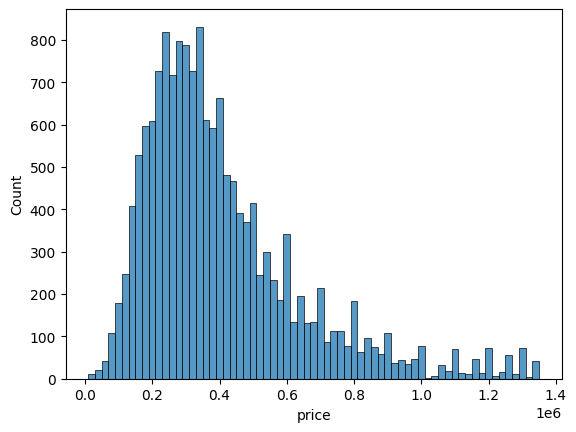

In [25]:
# convert to integers
df['price'] = pd.to_numeric(df['price'])
df_price_outlyers = df[df['price'] <= 1350000]
sns.histplot(df_price_outlyers, x='price')

<Axes: xlabel='price', ylabel='Count'>

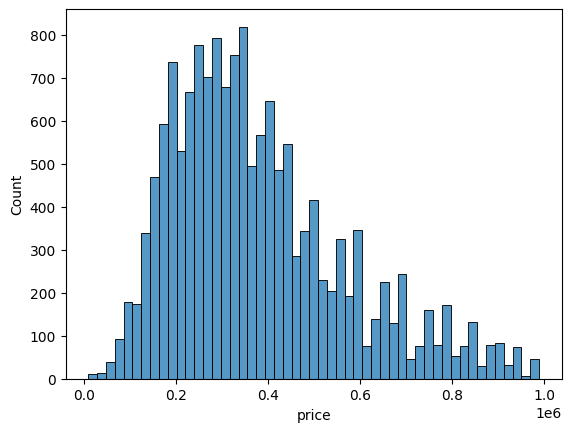

In [26]:
# need to filter out the outlyers
df = remove_outliers_iqr(df, 'price')
sns.histplot(x=df['price'])

### 1. Locality

In [27]:
analyze_column(df, 'locality')

Analysis for column 'locality':
Number of NaN values: 0
Number of unique values: 2099
Percentage of NaN values: 0.00%
Percentage of unique values: 13.64%
Unique values: ['Ham' 'Putte' 'IVOZ-RAMET' ... 'MONT-SAINTE-ALDEGONDE' 'Louveigné'
 'GrÃce-Hollogne']


In [28]:
df['locality'].info()

<class 'pandas.core.series.Series'>
Index: 15393 entries, 0 to 16753
Series name: locality
Non-Null Count  Dtype 
--------------  ----- 
15393 non-null  object
dtypes: object(1)
memory usage: 240.5+ KB


In [29]:
list_cities = df['locality'].unique()

In [30]:
# USING OPENCAGE to get longitude and latitude
# from opencage.geocoder import OpenCageGeocode
# key = "8adf7c226ce340589f05518e1cb51450"
# geocoder = OpenCageGeocode(key)

# latitudes = []
# longitudes = []

# for address in list_cities:
# 	result = geocoder.geocode(address, no_annotations="1")

# 	if result and len(result):
# 		longitude = result[0]['geometry']['lng']
# 		latitude = result[0]['geometry']['lat']
# 	else:
# 		longitude = "N/A"
# 		latitude = "N/A"

# 	with open('data/longlat.csv', 'a') as f:
# 		f.write(address)
# 		f.write(',')
# 		f.write(str(latitude)),
# 		f.write(',')
# 		f.write(str(longitude))
# 		f.write('\n')


In [31]:
# add columns w longitude latitude
df_ll = pd.read_csv('data/longlat.csv', on_bad_lines='skip')

In [32]:
df_ll

,locality,latitude,longitude
0,Ham,49.746322,3.073303
1,Putte,51.057082,4.631047
2,IVOZ-RAMET,50.582277,5.452349
3,Herstal,50.665041,5.629981
4,Liege,50.645094,5.573611
...,...,...,...
2396,Petigny,50.058382,4.532427
2397,Zwijndrecht Burcht,51.202805,4.341636
2398,Liege (Bressoux),50.641296,5.611144
2399,FONTAINE-VALMONT,50.320469,4.213974


In [33]:
# get all the long and lat values in the DF datafram
df = pd.merge(df, df_ll)
df['longitude'].replace('N/A', np.nan, inplace=True)
df['latitude'].replace('N/A', np.nan, inplace=True)

df = df.dropna(subset=['longitude', 'latitude'])

### 2. Property Type 

In [34]:
analyze_column(df, 'property_type')

Analysis for column 'property_type':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.01%
Unique values: ['HOUSE' 'APARTMENT']


In [35]:
# No NaN Values
df['property_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15284 entries, 0 to 15283
Series name: property_type
Non-Null Count  Dtype 
--------------  ----- 
15284 non-null  object
dtypes: object(1)
memory usage: 119.5+ KB


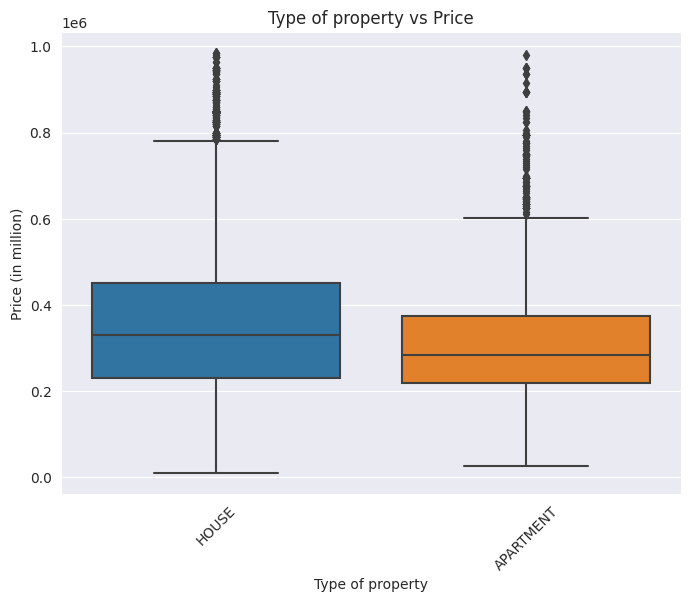

In [161]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'property_type', y = 'price',  data = df,ax=ax)
plt.title('Type of property vs Price')
plt.xlabel('Type of property')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)

### 3. Property Subtype

In [37]:
analyze_column(df, 'property_subtype')

Analysis for column 'property_subtype':
Number of NaN values: 0
Number of unique values: 23
Percentage of NaN values: 0.00%
Percentage of unique values: 0.15%
Unique values: ['VILLA' 'HOUSE' 'MANOR_HOUSE' 'DUPLEX' 'FARMHOUSE' 'APARTMENT'
 'APARTMENT_BLOCK' 'MIXED_USE_BUILDING' 'TOWN_HOUSE'
 'EXCEPTIONAL_PROPERTY' 'BUNGALOW' 'MANSION' 'COUNTRY_COTTAGE'
 'FLAT_STUDIO' 'CHALET' 'GROUND_FLOOR' 'PENTHOUSE' 'SERVICE_FLAT'
 'TRIPLEX' 'LOFT' 'OTHER_PROPERTY' 'KOT' 'CASTLE']


In [38]:
df['property_subtype'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15284 entries, 0 to 15283
Series name: property_subtype
Non-Null Count  Dtype 
--------------  ----- 
15284 non-null  object
dtypes: object(1)
memory usage: 119.5+ KB


<Axes: xlabel='property_subtype', ylabel='Count'>

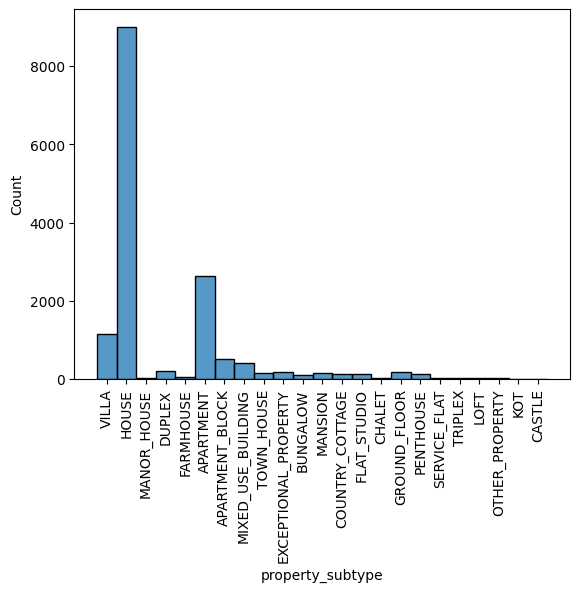

In [39]:
plt.xticks(rotation=90)
sns.histplot(df, x='property_subtype')

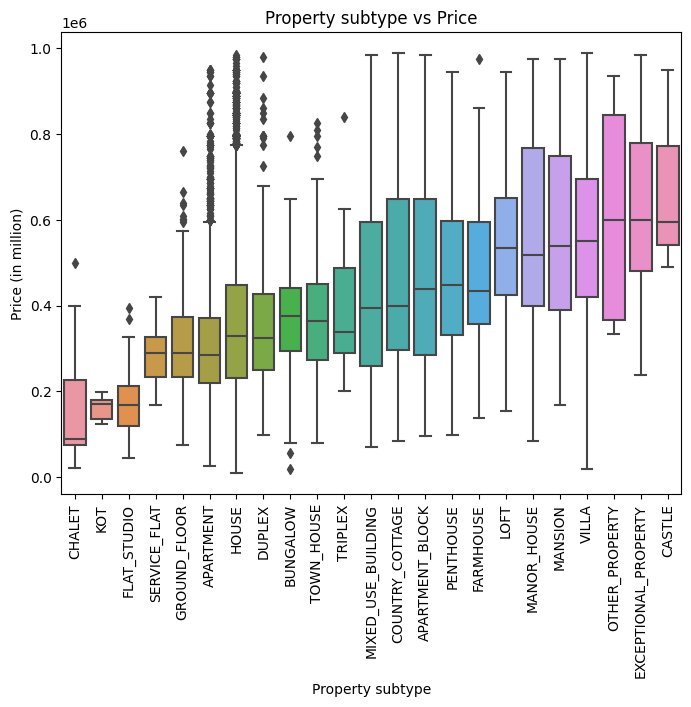

In [40]:
# Sort the boxplot graphs on mean pricing (ascending)
mean_prices = df.groupby('property_subtype')['price'].mean().sort_values(ascending=True)
sorted_categories = mean_prices.index.tolist()
df['property_subtype'] = pd.Categorical(df['property_subtype'], categories=sorted_categories, ordered=True)

#creating the boxplot per property subtype
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'property_subtype', y = 'price',  data = df,ax=ax)
plt.title('Property subtype vs Price')
plt.xlabel('Property subtype')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

### 4. Number of Rooms

In [41]:
analyze_column(df, 'number_rooms')

Analysis for column 'number_rooms':
Number of NaN values: 0
Number of unique values: 22
Percentage of NaN values: 0.00%
Percentage of unique values: 0.14%
Unique values: [ 4.  3. 10.  5.  2.  6.  7.  8.  1. 13.  0.  9. 16. 12. 11. 18. 60. 17.
 25. 15. 21. 46.]


In [42]:
df['number_rooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15284 entries, 0 to 15283
Series name: number_rooms
Non-Null Count  Dtype  
--------------  -----  
15284 non-null  float64
dtypes: float64(1)
memory usage: 119.5 KB


<Axes: xlabel='number_rooms'>

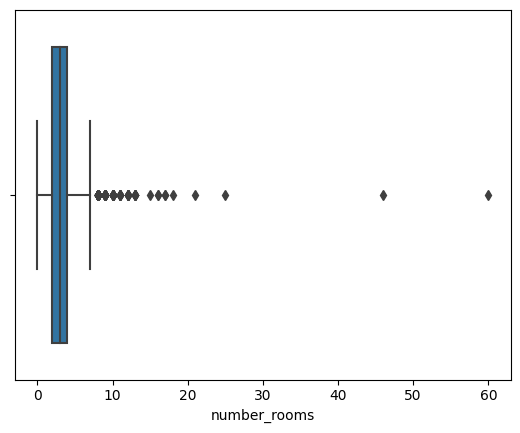

In [43]:
sns.boxplot(x=df['number_rooms'])

<Axes: xlabel='number_rooms', ylabel='Count'>

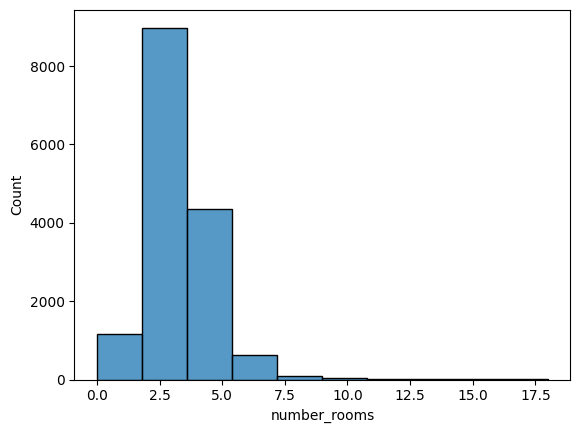

In [44]:
df_num_rooms = df[df['number_rooms'] <= 20]

sns.histplot(df_num_rooms, x='number_rooms', bins = 10)
# Good metric would be to use num_rooms up to 20

<Axes: xlabel='number_rooms'>

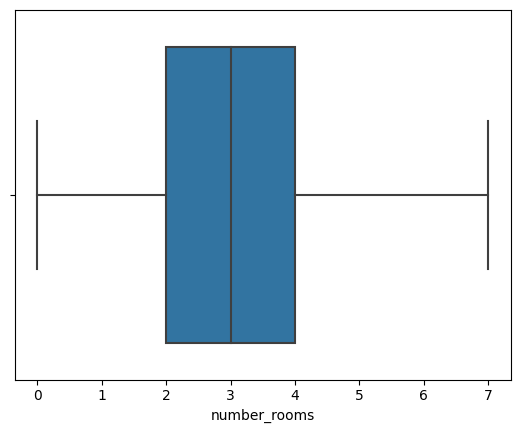

In [45]:
# Need to remove outlyers to get good normal distribution (using IQR method)
df = remove_outliers_iqr(df, 'number_rooms')
sns.boxplot(x=df['number_rooms'])

Text(0.5, 1.0, 'Histogram - number of rooms')

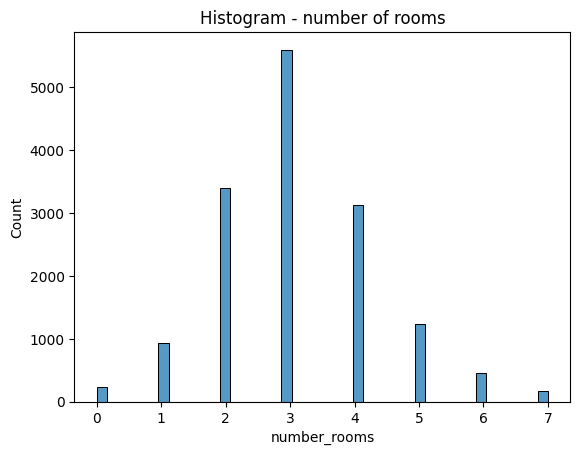

In [46]:
sns.histplot(x=df['number_rooms'])
plt.title('Histogram - number of rooms')

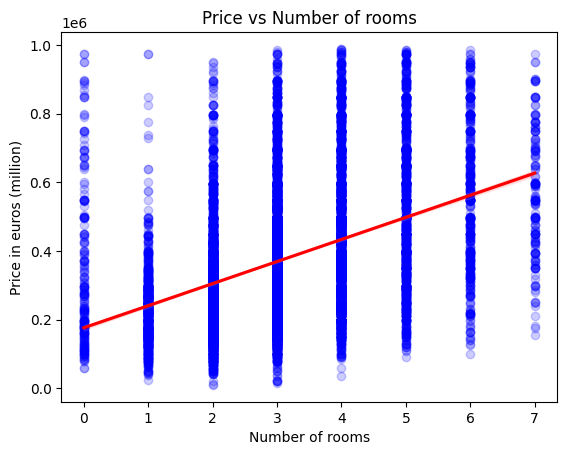

In [47]:
sns.regplot(df, x='number_rooms', y='price', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Price vs Number of rooms')
plt.ylabel('Price in euros (million)')
plt.xlabel('Number of rooms')
sns.set_style('darkgrid')

### 5. Living Area

In [48]:
analyze_column(df, 'living_area')

Analysis for column 'living_area':
Number of NaN values: 871
Number of unique values: 538
Percentage of NaN values: 5.76%
Percentage of unique values: 3.56%
Unique values: [2.1500e+02 1.9700e+02 1.9200e+02 1.9500e+02 1.6500e+02 3.1900e+02
 3.5100e+02 1.0400e+02 2.7300e+02 1.6700e+02 2.3200e+02 2.0300e+02
 1.7200e+02 2.6000e+02 2.6300e+02 1.1800e+02 1.4100e+02 2.6100e+02
 2.7000e+02 9.7000e+01 1.5900e+02 1.7500e+02 1.0300e+02 1.7000e+02
 1.8700e+02 2.2100e+02 2.8700e+02 8.5000e+01 1.5300e+02        nan
 1.5000e+02 2.1100e+02 2.2000e+02 1.3000e+02 1.0000e+02 1.8200e+02
 1.2000e+02 8.1000e+01 2.3100e+02 1.2400e+02 1.6400e+02 3.0100e+02
 1.2100e+02 2.0100e+02 1.3600e+02 1.4000e+02 1.3700e+02 1.0500e+02
 6.8000e+01 1.6100e+02 1.3500e+02 1.1000e+02 9.0000e+01 2.0400e+02
 1.4500e+02 5.9000e+01 7.5000e+01 1.1500e+02 1.7100e+02 1.1200e+02
 1.2700e+02 1.7900e+02 6.2000e+01 2.2200e+02 2.4200e+02 1.6900e+02
 2.2300e+02 4.2300e+02 1.2300e+02 6.0000e+01 1.9100e+02 2.3900e+02
 2.9500e+02 5.5000e+01 2

In [49]:
analyze_column(df, 'living_area')

Analysis for column 'living_area':
Number of NaN values: 871
Number of unique values: 538
Percentage of NaN values: 5.76%
Percentage of unique values: 3.56%
Unique values: [2.1500e+02 1.9700e+02 1.9200e+02 1.9500e+02 1.6500e+02 3.1900e+02
 3.5100e+02 1.0400e+02 2.7300e+02 1.6700e+02 2.3200e+02 2.0300e+02
 1.7200e+02 2.6000e+02 2.6300e+02 1.1800e+02 1.4100e+02 2.6100e+02
 2.7000e+02 9.7000e+01 1.5900e+02 1.7500e+02 1.0300e+02 1.7000e+02
 1.8700e+02 2.2100e+02 2.8700e+02 8.5000e+01 1.5300e+02        nan
 1.5000e+02 2.1100e+02 2.2000e+02 1.3000e+02 1.0000e+02 1.8200e+02
 1.2000e+02 8.1000e+01 2.3100e+02 1.2400e+02 1.6400e+02 3.0100e+02
 1.2100e+02 2.0100e+02 1.3600e+02 1.4000e+02 1.3700e+02 1.0500e+02
 6.8000e+01 1.6100e+02 1.3500e+02 1.1000e+02 9.0000e+01 2.0400e+02
 1.4500e+02 5.9000e+01 7.5000e+01 1.1500e+02 1.7100e+02 1.1200e+02
 1.2700e+02 1.7900e+02 6.2000e+01 2.2200e+02 2.4200e+02 1.6900e+02
 2.2300e+02 4.2300e+02 1.2300e+02 6.0000e+01 1.9100e+02 2.3900e+02
 2.9500e+02 5.5000e+01 2

In [50]:
# Theres quite a bit of Nan Values (5.41%)- checking these out 
#(we could backfill the NaN values with the mean of the Living_ area per property_subtype)
df[df['living_area'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
32,Putte,HOUSE,HOUSE,649000.0,3.0,NaN,HYPER_EQUIPPED,NaN,1.0,True,...,True,512.0,512,4,True,AS_NEW,Flanders,Antwerp,51.057082,4.631047
39,IVOZ-RAMET,HOUSE,HOUSE,155000.0,3.0,NaN,NaN,NaN,-1.0,True,...,NaN,NaN,70,2,NaN,TO_RENOVATE,Wallonie,Liège,50.582277,5.452349
42,Herstal,HOUSE,APARTMENT_BLOCK,425000.0,5.0,NaN,0,NaN,NaN,True,...,NaN,NaN,0,2,NaN,GOOD,Wallonie,Liège,50.665041,5.629981
84,Herstal,HOUSE,HOUSE,245000.0,4.0,NaN,0,NaN,-1.0,True,...,True,500.0,916,3,NaN,TO_BE_DONE_UP,Wallonie,Liège,50.665041,5.629981
118,Liege,HOUSE,MIXED_USE_BUILDING,235000.0,0.0,NaN,0,NaN,NaN,NaN,...,NaN,NaN,0,2,NaN,GOOD,Wallonie,Liège,50.645094,5.573611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15160,Bellefontaine,HOUSE,HOUSE,499000.0,4.0,NaN,SEMI_EQUIPPED,NaN,1.0,True,...,NaN,NaN,900,3,True,TO_BE_DONE_UP,Wallonie,Luxembourg,48.015172,6.443377
15223,LUINGNE,HOUSE,COUNTRY_COTTAGE,500000.0,7.0,NaN,0,NaN,-1.0,True,...,NaN,NaN,2086,4,NaN,GOOD,Wallonie,Hainaut,50.738394,3.233738
15234,Mormont,HOUSE,HOUSE,220000.0,4.0,NaN,INSTALLED,NaN,NaN,NaN,...,NaN,NaN,2170,4,NaN,GOOD,Wallonie,Luxembourg,50.326333,5.592465
15242,St-Kruis,HOUSE,HOUSE,380000.0,3.0,NaN,INSTALLED,False,NaN,NaN,...,NaN,NaN,454,3,NaN,AS_NEW,Flanders,West Flanders,51.214202,3.250651


In [163]:
# backfill the NaN values with the mean of the Living_area per property_subtype
mean_living_area = df.groupby('property_subtype')['living_area'].transform('mean')
#  Transform function is used to calculate the mean living area for each property subtype.

In [164]:
mean_living_area = df.groupby('property_subtype')['living_area'].transform('mean')
filled_nan_living_area = df.groupby('property_subtype')['living_area'].fillna(round(mean_living_area))
df['living_area'] = filled_nan_living_area

In [165]:
df[df['living_area'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude,price_per_area_m2


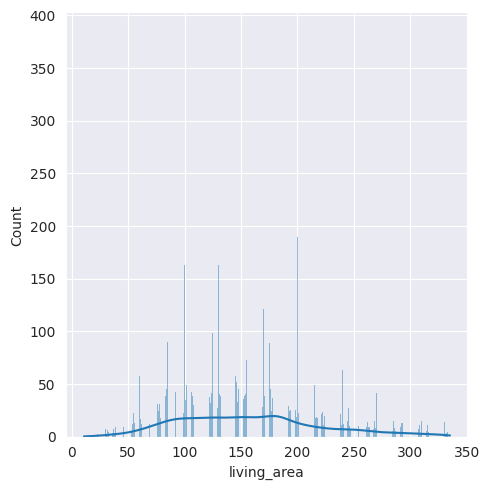

In [171]:
df_living_area = df[df['living_area'] <= 600]
sns.displot(df_living_area, x='living_area', bins=1000, kde=True)

<Axes: xlabel='living_area'>

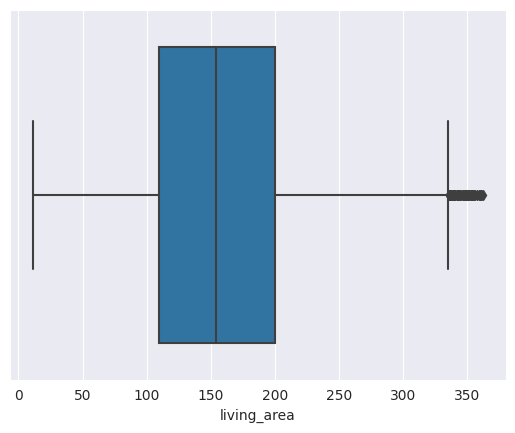

In [167]:
# Visualise and Remove the outlyers
sns.boxplot(x=df['living_area'])

<Axes: xlabel='living_area'>

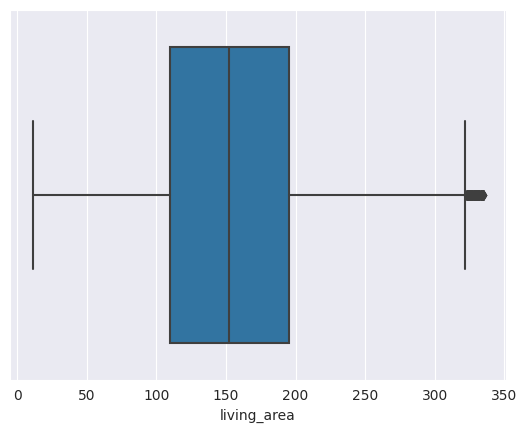

In [168]:
df = remove_outliers_iqr(df, 'living_area')
sns.boxplot(x=df['living_area'])

Text(0.5, 1.0, 'Histogram - Living Area')

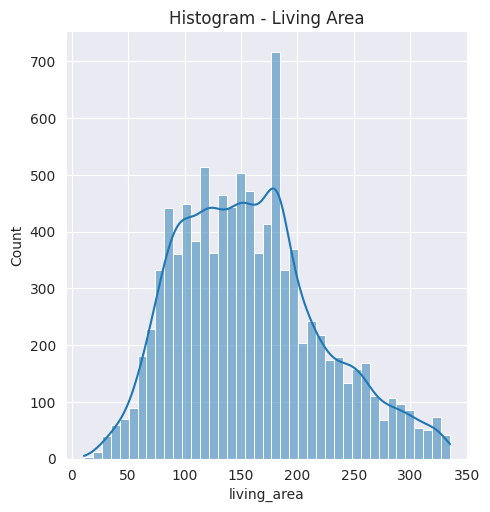

In [172]:
sns.displot(x=df['living_area'], kde=True)
plt.title('Histogram - Living Area')

### 6. Kitchen

In [58]:
df['kitchen'].unique()

array(['INSTALLED', 'HYPER_EQUIPPED', 'NOT_INSTALLED', '0',
       'SEMI_EQUIPPED', 'USA_HYPER_EQUIPPED', nan, 'USA_INSTALLED',
       'USA_SEMI_EQUIPPED', 'USA_UNINSTALLED'], dtype=object)

In [59]:
df[df['kitchen'].isna()]
# TODO: We have a lot of NaN values - What to do with these?

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
39,IVOZ-RAMET,HOUSE,HOUSE,155000.0,3.0,183.0,NaN,NaN,-1.0,True,...,NaN,NaN,70,2,NaN,TO_RENOVATE,Wallonie,Liège,50.582277,5.452349
51,Herstal,HOUSE,APARTMENT_BLOCK,283000.0,3.0,164.0,NaN,NaN,NaN,True,...,NaN,NaN,0,2,False,TO_BE_DONE_UP,Wallonie,Liège,50.665041,5.629981
66,Herstal,HOUSE,APARTMENT_BLOCK,249000.0,7.0,232.0,NaN,NaN,-1.0,NaN,...,NaN,NaN,779,2,NaN,NaN,Wallonie,Liège,50.665041,5.629981
80,Herstal,HOUSE,HOUSE,139500.0,3.0,90.0,NaN,False,NaN,NaN,...,True,30.0,66,2,False,TO_RENOVATE,Wallonie,Liège,50.665041,5.629981
89,Herstal,HOUSE,HOUSE,219000.0,4.0,171.0,NaN,False,NaN,True,...,True,541.0,706,3,NaN,GOOD,Wallonie,Liège,50.665041,5.629981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15254,Flémalle-Grande,HOUSE,HOUSE,239000.0,2.0,120.0,NaN,NaN,-1.0,NaN,...,True,370.0,430,3,NaN,NaN,Wallonie,Liège,50.615394,5.473085
15258,SEPTON,HOUSE,HOUSE,450000.0,3.0,183.0,NaN,NaN,-1.0,True,...,NaN,NaN,1639,4,NaN,NaN,Wallonie,Luxembourg,50.360101,5.437417
15262,Angre,HOUSE,HOUSE,49000.0,1.0,65.0,NaN,NaN,NaN,NaN,...,NaN,NaN,916,4,NaN,TO_RENOVATE,Wallonie,Hainaut,50.366983,3.695451
15267,Haut-fays,HOUSE,HOUSE,239000.0,7.0,158.0,NaN,False,NaN,True,...,True,166.0,266,4,NaN,GOOD,Wallonie,Luxembourg,50.001171,5.016915


In [60]:
df[df['kitchen'] == '0']
# need to change this '0' to NOT_DEFINED - NOT CERTAIN but probably when filling out the survey of the listing the operator filled out 0 in a lot of cases
# To not assume it's installed or not installed we will make a new category - NOT_DEFINED
df['kitchen'].replace('0', 'NOT_DEFINED', inplace=True)
df[df['kitchen'] == 'NOT_DEFINED']

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
10,Ham,APARTMENT,DUPLEX,245000.0,2.0,104.0,NOT_DEFINED,False,NaN,NaN,...,NaN,NaN,NaN,3,False,GOOD,Flanders,Limburg,49.746322,3.073303
20,Putte,HOUSE,HOUSE,589000.0,4.0,261.0,NOT_DEFINED,NaN,NaN,NaN,...,NaN,NaN,523,NaN,False,NaN,Flanders,Antwerp,51.057082,4.631047
23,Putte,HOUSE,HOUSE,393000.0,3.0,159.0,NOT_DEFINED,NaN,1.0,True,...,True,300.0,712,4,False,NaN,Flanders,Antwerp,51.057082,4.631047
30,Putte,APARTMENT,APARTMENT,285000.0,2.0,85.0,NOT_DEFINED,False,NaN,NaN,...,NaN,NaN,NaN,2,NaN,AS_NEW,Flanders,Antwerp,51.057082,4.631047
41,Herstal,HOUSE,HOUSE,225000.0,2.0,81.0,NOT_DEFINED,NaN,-1.0,True,...,True,104.0,225,3,NaN,JUST_RENOVATED,Wallonie,Liège,50.665041,5.629981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15248,HOUWAART,HOUSE,HOUSE,550000.0,3.0,190.0,NOT_DEFINED,NaN,-1.0,True,...,True,333.0,413,3,NaN,NaN,Flanders,Flemish Brabant,50.932981,4.859555
15270,VELAINES,HOUSE,HOUSE,450000.0,3.0,331.0,NOT_DEFINED,NaN,-1.0,True,...,NaN,NaN,1740,4,NaN,NaN,Wallonie,Hainaut,48.703359,5.300107
15271,Zwijndrecht Burcht,HOUSE,HOUSE,170000.0,2.0,140.0,NOT_DEFINED,NaN,NaN,NaN,...,NaN,NaN,190,2,NaN,TO_RENOVATE,Flanders,Antwerp,51.202805,4.341636
15272,Liege (Bressoux),HOUSE,MIXED_USE_BUILDING,171000.0,4.0,166.0,NOT_DEFINED,NaN,NaN,NaN,...,NaN,NaN,0,3,False,GOOD,Wallonie,Liège,50.641296,5.611144


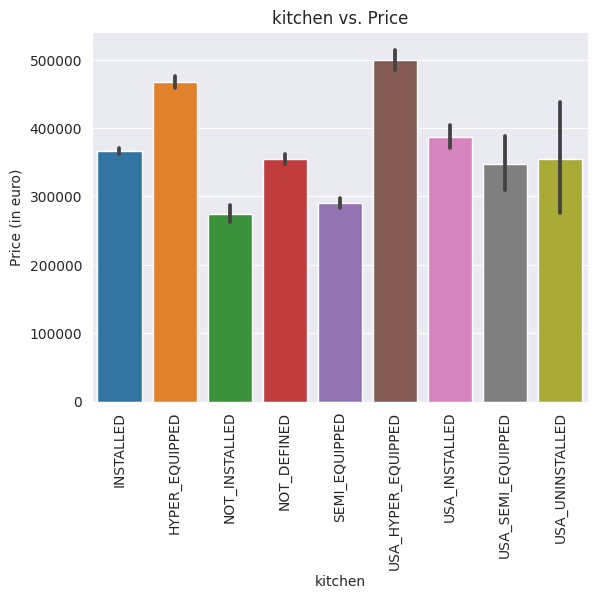

In [61]:
create_cat_plot(df, 'kitchen', 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'HYPER_EQUIPPED'),
  Text(1, 0, 'NOT_INSTALLED'),
  Text(2, 0, 'INSTALLED'),
  Text(3, 0, 'NOT_DEFINED'),
  Text(4, 0, 'USA_HYPER_EQUIPPED'),
  Text(5, 0, 'SEMI_EQUIPPED'),
  Text(6, 0, 'USA_INSTALLED'),
  Text(7, 0, 'USA_SEMI_EQUIPPED'),
  Text(8, 0, 'USA_UNINSTALLED')])

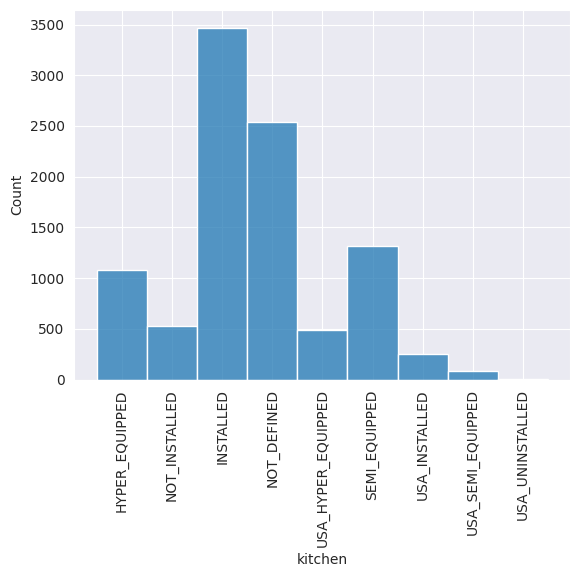

In [174]:
sns.histplot(df, x='kitchen')
plt.xticks(rotation=90)

In [63]:
df['kitchen'].describe()

count         13163
unique            9
top       INSTALLED
freq           5285
Name: kitchen, dtype: object

In [64]:
df[df['kitchen'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
39,IVOZ-RAMET,HOUSE,HOUSE,155000.0,3.0,183.0,NaN,NaN,-1.0,True,...,NaN,NaN,70,2,NaN,TO_RENOVATE,Wallonie,Liège,50.582277,5.452349
51,Herstal,HOUSE,APARTMENT_BLOCK,283000.0,3.0,164.0,NaN,NaN,NaN,True,...,NaN,NaN,0,2,False,TO_BE_DONE_UP,Wallonie,Liège,50.665041,5.629981
66,Herstal,HOUSE,APARTMENT_BLOCK,249000.0,7.0,232.0,NaN,NaN,-1.0,NaN,...,NaN,NaN,779,2,NaN,NaN,Wallonie,Liège,50.665041,5.629981
80,Herstal,HOUSE,HOUSE,139500.0,3.0,90.0,NaN,False,NaN,NaN,...,True,30.0,66,2,False,TO_RENOVATE,Wallonie,Liège,50.665041,5.629981
89,Herstal,HOUSE,HOUSE,219000.0,4.0,171.0,NaN,False,NaN,True,...,True,541.0,706,3,NaN,GOOD,Wallonie,Liège,50.665041,5.629981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15254,Flémalle-Grande,HOUSE,HOUSE,239000.0,2.0,120.0,NaN,NaN,-1.0,NaN,...,True,370.0,430,3,NaN,NaN,Wallonie,Liège,50.615394,5.473085
15258,SEPTON,HOUSE,HOUSE,450000.0,3.0,183.0,NaN,NaN,-1.0,True,...,NaN,NaN,1639,4,NaN,NaN,Wallonie,Luxembourg,50.360101,5.437417
15262,Angre,HOUSE,HOUSE,49000.0,1.0,65.0,NaN,NaN,NaN,NaN,...,NaN,NaN,916,4,NaN,TO_RENOVATE,Wallonie,Hainaut,50.366983,3.695451
15267,Haut-fays,HOUSE,HOUSE,239000.0,7.0,158.0,NaN,False,NaN,True,...,True,166.0,266,4,NaN,GOOD,Wallonie,Luxembourg,50.001171,5.016915


In [65]:
df['kitchen'].replace(np.nan, 'NOT_DEFINED', inplace=True)

In [66]:
df[df['kitchen'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude


Text(0.5, 1.0, 'Type of kitchen - counts')

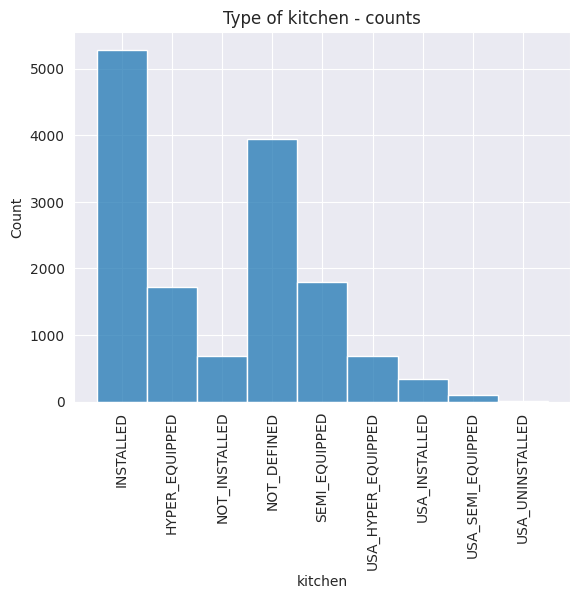

In [67]:
sns.histplot(df, x='kitchen')
plt.xticks(rotation=90)
plt.title('Type of kitchen - counts')

### 7. Furnished

In [68]:
analyze_column(df, 'furnished')

Analysis for column 'furnished':
Number of NaN values: 7559
Number of unique values: 2
Percentage of NaN values: 51.84%
Percentage of unique values: 0.01%
Unique values: [nan False True]


In [69]:
# A lot of NaN - can be assume that this NaN mean it is not furnished (I think so - especially Belgium not a lot of houses are sold furnished)
# replacing the NaN values with False
df['furnished'] = df['furnished'].replace(np.nan, False)

# replace the False values with 0 and the True values with 1
df['furnished'].replace(False, 0, inplace=True)
df['furnished'].replace(True, 1, inplace=True)

In [70]:
df[df['furnished'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude


In [71]:
df['furnished'].unique()

array([0, 1])

Text(0, 0.5, 'count')

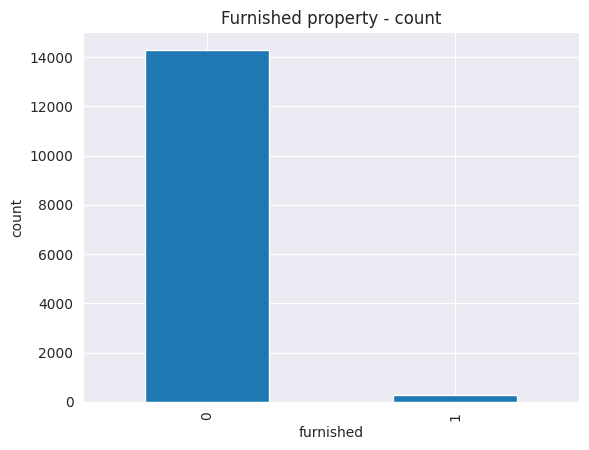

In [72]:
df['furnished'].value_counts().plot(kind='bar')
plt.title('Furnished property - count')
plt.ylabel('count')

### 8. Fireplace

In [73]:
analyze_column(df, 'fireplace')

Analysis for column 'fireplace':
Number of NaN values: 9940
Number of unique values: 6
Percentage of NaN values: 68.17%
Percentage of unique values: 0.04%
Unique values: [-1. nan  1.  2.  3.  4. 10.]


In [74]:
df['fireplace'].unique()

array([-1., nan,  1.,  2.,  3.,  4., 10.])

In [75]:
# ASSUMPTION 1: -1 means there is no fireplace
df[df['fireplace'] == -1]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,0,-1.0,NaN,...,True,NaN,1472,4,NaN,GOOD,Flanders,Limburg,49.746322,3.073303
6,Ham,HOUSE,HOUSE,295000.0,3.0,165.0,INSTALLED,0,-1.0,NaN,...,True,NaN,457,3,NaN,JUST_RENOVATED,Flanders,Limburg,49.746322,3.073303
9,Ham,HOUSE,VILLA,549000.0,5.0,351.0,INSTALLED,0,-1.0,NaN,...,True,NaN,0,4,NaN,GOOD,Flanders,Limburg,49.746322,3.073303
12,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,0,-1.0,True,...,True,95.0,416,4,NaN,JUST_RENOVATED,Flanders,Antwerp,51.057082,4.631047
15,Putte,HOUSE,HOUSE,375000.0,3.0,172.0,INSTALLED,0,-1.0,NaN,...,NaN,NaN,705,4,NaN,GOOD,Flanders,Antwerp,51.057082,4.631047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15254,Flémalle-Grande,HOUSE,HOUSE,239000.0,2.0,120.0,NOT_DEFINED,0,-1.0,NaN,...,True,370.0,430,3,NaN,NaN,Wallonie,Liège,50.615394,5.473085
15258,SEPTON,HOUSE,HOUSE,450000.0,3.0,183.0,NOT_DEFINED,0,-1.0,True,...,NaN,NaN,1639,4,NaN,NaN,Wallonie,Luxembourg,50.360101,5.437417
15270,VELAINES,HOUSE,HOUSE,450000.0,3.0,331.0,NOT_DEFINED,0,-1.0,True,...,NaN,NaN,1740,4,NaN,NaN,Wallonie,Hainaut,48.703359,5.300107
15273,FONTAINE-VALMONT,HOUSE,HOUSE,175000.0,2.0,125.0,SEMI_EQUIPPED,0,-1.0,NaN,...,NaN,NaN,3940,2,NaN,JUST_RENOVATED,Wallonie,Hainaut,50.320469,4.213974


In [76]:
# Replace the -1 values with 0
df['fireplace'].replace(-1, 0, inplace=True)

In [77]:
# ASSUMPTION 2 : -1 means there is no fireplace
# Replace the NaN values with 0
df['fireplace'].replace(np.nan, 0, inplace=True)

In [78]:
df['fireplace'].unique()

array([ 0.,  1.,  2.,  3.,  4., 10.])

Text(0.5, 1.0, 'fireplace vs Price - per Region')

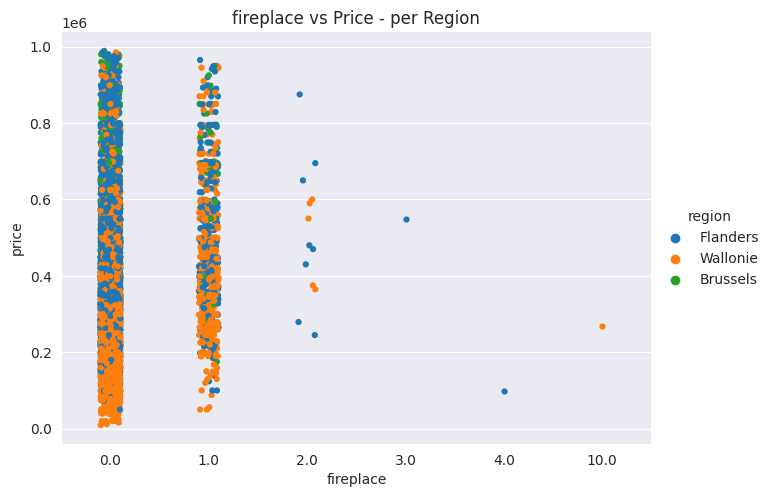

In [79]:
sns.catplot(data=df,x='fireplace',y='price',
               size=4.5,aspect=1.35, hue='region')
plt.title('fireplace vs Price - per Region')

In [80]:
df['fireplace'].unique()

array([ 0.,  1.,  2.,  3.,  4., 10.])

<Axes: xlabel='fireplace'>

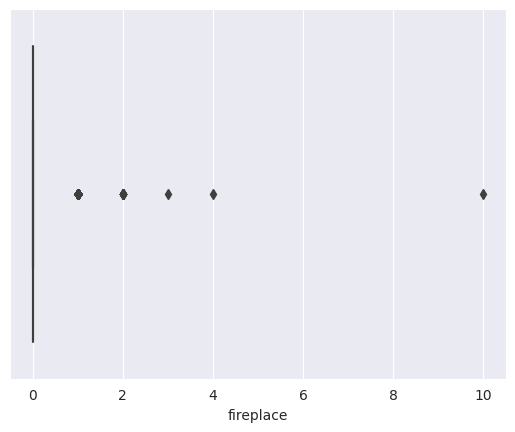

In [81]:
sns.boxplot(x =df['fireplace'])

In [82]:
# Remove outlyers (all 2 up to 10 - 8 entries)
df[df['fireplace'] >= 2]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
973,Geraardsbergen,HOUSE,HOUSE,245000.0,3.0,183.0,INSTALLED,0,2.0,NaN,...,NaN,NaN,100,3,NaN,GOOD,Flanders,East Flanders,50.771578,3.882729
1255,Maldegem,HOUSE,VILLA,470000.0,6.0,327.0,INSTALLED,0,2.0,True,...,NaN,NaN,738,4,NaN,GOOD,Flanders,East Flanders,51.208887,3.445221
1590,Beersel,HOUSE,VILLA,650000.0,4.0,242.0,INSTALLED,0,2.0,True,...,True,3400.0,3600,4,NaN,TO_RENOVATE,Flanders,Flemish Brabant,50.747841,4.306527
2640,Nivelles,HOUSE,EXCEPTIONAL_PROPERTY,600000.0,3.0,244.0,INSTALLED,0,2.0,True,...,True,3558.0,3718,4,False,NaN,Wallonie,Walloon Brabant,50.597688,4.323585
2708,Namur,HOUSE,VILLA,365000.0,2.0,120.0,SEMI_EQUIPPED,0,2.0,True,...,True,1.0,908,4,False,JUST_RENOVATED,Wallonie,Namur,50.466528,4.866189
2803,Gent,HOUSE,EXCEPTIONAL_PROPERTY,548000.0,3.0,128.0,INSTALLED,0,3.0,True,...,NaN,NaN,127,2,NaN,GOOD,Flanders,East Flanders,51.053829,3.725012
5365,Ronse,HOUSE,HOUSE,99000.0,2.0,183.0,NOT_DEFINED,0,4.0,NaN,...,True,NaN,488,3,NaN,TO_BE_DONE_UP,Flanders,East Flanders,50.752620,3.601448
6044,Essen,HOUSE,COUNTRY_COTTAGE,875000.0,4.0,258.0,INSTALLED,0,2.0,True,...,True,4500.0,5978,4,False,GOOD,Flanders,Antwerp,51.458224,7.015817
10180,Tubize,HOUSE,VILLA,375000.0,3.0,180.0,INSTALLED,0,2.0,True,...,True,180.0,395,4,False,AS_NEW,Wallonie,Walloon Brabant,50.693020,4.204696
10288,Templeuve,HOUSE,EXCEPTIONAL_PROPERTY,550000.0,5.0,315.0,NOT_DEFINED,0,2.0,True,...,NaN,NaN,6255,4,NaN,NaN,Wallonie,Hainaut,50.532628,3.174054


Text(0.5, 1.0, 'fireplace vs Price - per Region')

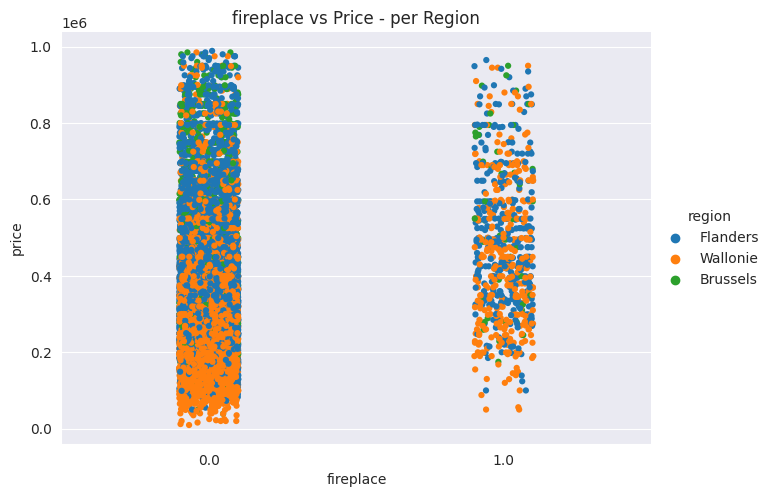

In [83]:
df = df[df['fireplace'] < 2]
sns.catplot(data=df,x='fireplace',y='price',
               size=4.5,aspect=1.35, hue='region')
plt.title('fireplace vs Price - per Region')

### 9. Terrace

In [84]:
analyze_column(df, 'terrace')
# Assumption that NaN values are 0 and True values are 1

Analysis for column 'terrace':
Number of NaN values: 5058
Number of unique values: 1
Percentage of NaN values: 34.72%
Percentage of unique values: 0.01%
Unique values: [nan True]


In [85]:
df.replace(np.nan, 0, inplace=True)
df.replace(True, 1, inplace=True)

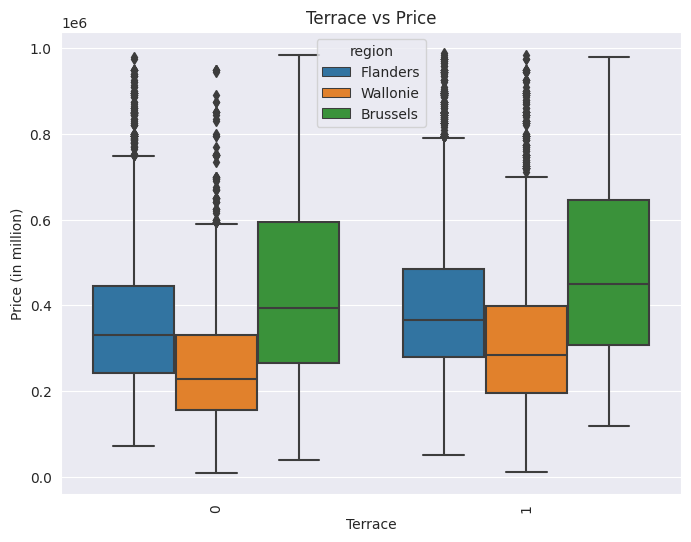

In [86]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x= 'terrace', y = 'price',  data = df,ax=ax, hue='region')
plt.title('Terrace vs Price')
plt.xlabel('Terrace')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Text(0.5, 1.0, 'Terrace count')

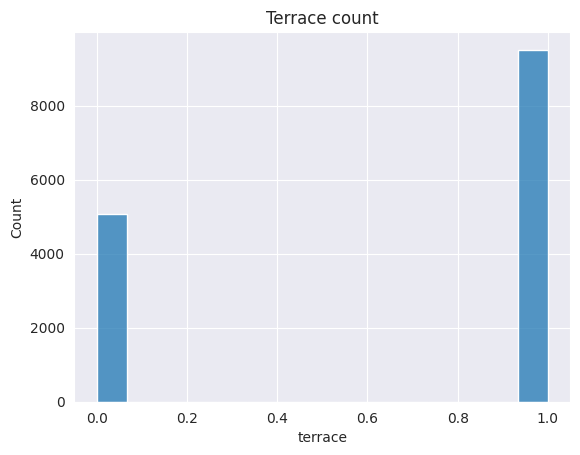

In [87]:
sns.histplot(df['terrace'])
plt.title('Terrace count')

### 10. Terrace Area

In [88]:
analyze_column(df, 'terrace_area')

Analysis for column 'terrace_area':
Number of NaN values: 0
Number of unique values: 153
Percentage of NaN values: 0.00%
Percentage of unique values: 1.05%
Unique values: [0.00e+00 2.00e+01 3.70e+01 3.00e+01 5.20e+01 3.50e+01 5.00e+00 1.30e+01
 1.20e+01 9.00e+00 8.00e+01 5.40e+01 5.30e+01 4.00e+01 2.50e+01 5.84e+02
 4.20e+01 3.40e+01 1.40e+01 1.10e+01 1.60e+01 1.80e+01 1.00e+01 2.90e+01
 6.00e+01 1.00e+00 2.40e+02 2.20e+01 4.80e+01 1.90e+01 3.90e+01 3.20e+01
 3.30e+01 3.26e+02 2.00e+00 6.50e+01 5.60e+01 2.70e+01 3.00e+00 5.50e+01
 8.00e+00 1.50e+01 7.00e+00 6.80e+01 2.40e+01 3.60e+01 7.00e+01 8.80e+01
 1.70e+01 4.50e+01 4.00e+00 5.00e+01 4.10e+01 4.30e+01 1.61e+02 8.10e+01
 2.80e+01 2.30e+01 1.20e+02 7.50e+01 1.96e+02 6.00e+00 4.40e+01 3.80e+01
 7.20e+01 5.70e+01 9.90e+01 1.00e+02 2.10e+01 1.08e+02 4.60e+01 5.10e+01
 3.10e+01 1.07e+02 1.82e+02 8.90e+01 9.80e+01 6.20e+01 8.50e+01 6.40e+01
 2.60e+01 1.12e+02 1.25e+02 2.00e+02 1.47e+02 1.23e+02 1.10e+02 9.20e+01
 4.34e+02 6.10e+01 8.40e+0

<Axes: xlabel='terrace_area'>

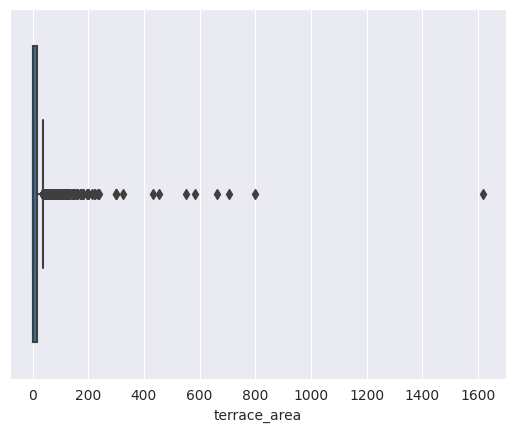

In [89]:
sns.boxplot(x=df['terrace_area'])

In [90]:
df.groupby('terrace')['terrace_area'].mean()

terrace
0     0.000000
1    16.436685
Name: terrace_area, dtype: float64

In [91]:
df[df['terrace_area'] == 0.0]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,0,0.0,0,...,1,0.0,1472,4,0,GOOD,Flanders,Limburg,49.746322,3.073303
1,Ham,HOUSE,HOUSE,399500.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,461,3,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
2,Ham,HOUSE,HOUSE,381000.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,343,3,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
3,Ham,HOUSE,HOUSE,393500.0,3.0,192.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,392,3,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
4,Ham,HOUSE,HOUSE,315000.0,3.0,197.0,NOT_INSTALLED,0,0.0,0,...,0,0.0,509,3,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15273,FONTAINE-VALMONT,HOUSE,HOUSE,175000.0,2.0,125.0,SEMI_EQUIPPED,0,0.0,0,...,0,0.0,3940,2,0,JUST_RENOVATED,Wallonie,Hainaut,50.320469,4.213974
15274,Havré,HOUSE,HOUSE,179000.0,3.0,138.0,INSTALLED,0,0.0,0,...,0,0.0,110,2,0,GOOD,Wallonie,Hainaut,50.460573,4.037512
15275,Havré,HOUSE,HOUSE,120000.0,2.0,90.0,SEMI_EQUIPPED,0,0.0,1,...,0,0.0,273,3,0,TO_BE_DONE_UP,Wallonie,Hainaut,50.460573,4.037512
15281,Sint-Martens-Latem,HOUSE,HOUSE,599000.0,4.0,199.0,HYPER_EQUIPPED,0,0.0,1,...,0,0.0,1104,4,False,TO_RENOVATE,Flanders,East Flanders,51.020971,3.639755


<Axes: xlabel='terrace_area'>

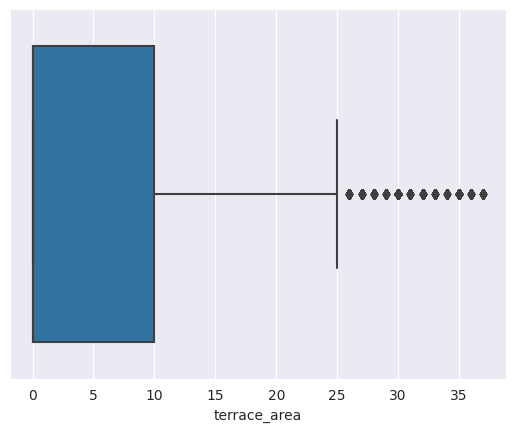

In [92]:
# need to remove the outlyers to get 'normal distribution'
df = remove_outliers_iqr(df, 'terrace_area')
sns.boxplot(x=df['terrace_area'])

/tmp/ipykernel_31652/2516338998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['terrace_area'])


<Axes: ylabel='Density'>

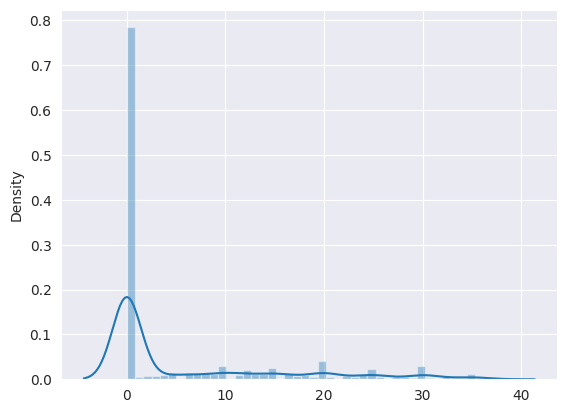

In [93]:
sns.distplot(x=df['terrace_area'])

### 11. Garden

In [94]:
analyze_column(df, 'garden')

Analysis for column 'garden':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.01%
Unique values: [1 0]


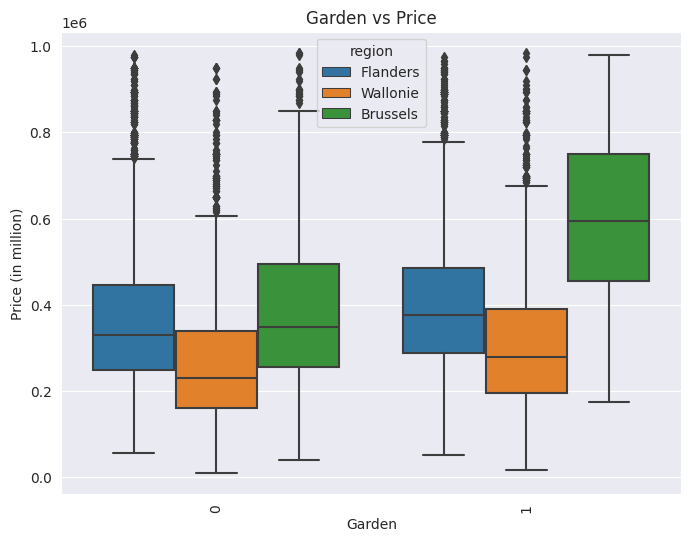

In [95]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'garden', y = 'price',  data = df,ax=ax, hue='region')
plt.title('Garden vs Price')
plt.xlabel('Garden')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)


### 12. Garden Area

In [96]:
analyze_column(df, 'garden_area')

Analysis for column 'garden_area':
Number of NaN values: 0
Number of unique values: 796
Percentage of NaN values: 0.00%
Percentage of unique values: 5.93%
Unique values: [0.0000e+00 9.5000e+01 6.0000e+02 3.0000e+02 2.0000e+02 6.0000e+01
 3.8000e+02 1.0800e+02 8.0000e+01 1.0400e+02 3.7000e+01 1.7000e+02
 7.0000e+01 1.3800e+02 1.1000e+02 1.3000e+02 4.0000e+01 5.1000e+01
 2.6000e+02 3.2000e+01 1.0000e+00 3.0000e+01 5.0000e+02 5.4100e+02
 9.0000e+01 2.4400e+02 7.5000e+01 2.0000e+01 2.8000e+01 1.0000e+02
 5.2000e+01 1.1800e+02 2.2000e+01 1.1100e+02 1.6100e+02 2.3800e+02
 8.8000e+01 2.3300e+02 6.5000e+01 4.1000e+01 1.1600e+02 8.5000e+01
 4.4000e+01 8.9000e+01 5.8000e+01 5.3000e+02 2.2500e+02 9.0000e+02
 8.9500e+02 7.7800e+02 1.4000e+03 2.6190e+03 2.6500e+02 3.9000e+02
 2.3400e+02 1.9980e+03 3.6338e+04 8.0000e+02 4.1000e+02 2.4000e+02
 2.3000e+03 5.8600e+02 6.5800e+02 5.0000e+01 6.2000e+02 3.5900e+02
 3.5200e+02 2.8500e+02 7.9200e+02 7.0500e+02 1.0000e+03 7.7500e+02
 8.4200e+02 1.8000e+02 1.5

<Axes: xlabel='garden_area'>

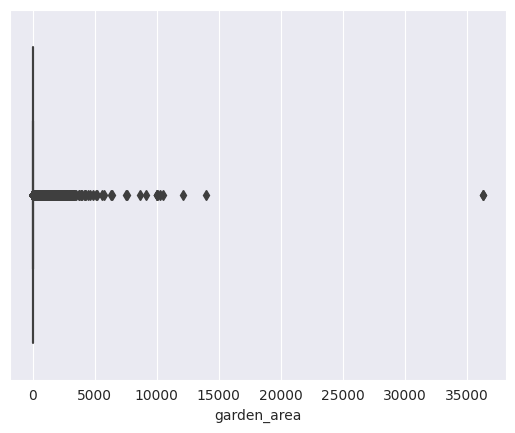

In [97]:
sns.boxplot(x=df['garden_area'])

<Axes: xlabel='garden_area'>

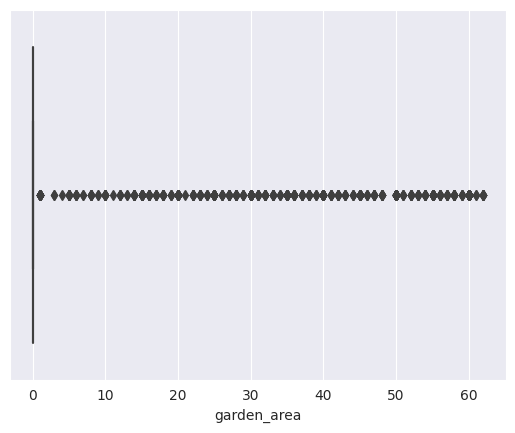

In [98]:
# Cannot get rid of the outlyers ! Leave as is
# This Garden Area is highly unbalanced!!
clean = remove_outliers_iqr(df,'garden_area')
sns.boxplot(x=clean['garden_area'])

### 13. Surface of the Land

In [99]:
analyze_column(df, 'surface_land')

Analysis for column 'surface_land':
Number of NaN values: 0
Number of unique values: 1979
Percentage of NaN values: 0.00%
Percentage of unique values: 14.74%
Unique values: ['1472' '461' '343' ... '3609' '5154' '3940']


In [100]:
df['surface_land'].replace('UNKNOWN', -1, inplace=True)

In [101]:
analyze_column(df, 'surface_land')

Analysis for column 'surface_land':
Number of NaN values: 0
Number of unique values: 1979
Percentage of NaN values: 0.00%
Percentage of unique values: 14.74%
Unique values: ['1472' '461' '343' ... '3609' '5154' '3940']


In [102]:
df['surface_land'] = df['surface_land'].astype(int)

In [103]:
df['surface_land']

0        1472
1         461
2         343
3         392
4         509
         ... 
15279     705
15280     517
15281    1104
15282     402
15283       0
Name: surface_land, Length: 13427, dtype: int64

In [104]:
# change the '-1' (first to np.nan) to the mean_value of surface_land grouped by property_subtype
df['surface_land'].replace(-1, np.nan, inplace=True)
mean_surface_land = df.groupby('property_subtype')['surface_land'].transform('mean')
filled_surface_land = df.groupby('property_subtype')['surface_land'].fillna(mean_surface_land)
df['surface_land'] = filled_surface_land

<Axes: xlabel='surface_land'>

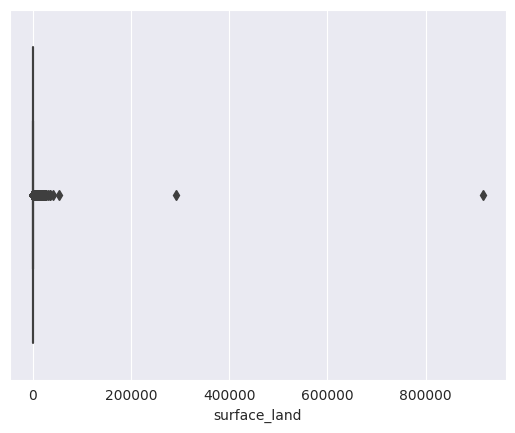

In [105]:
sns.boxplot(x=df['surface_land'])

<Axes: xlabel='surface_land'>

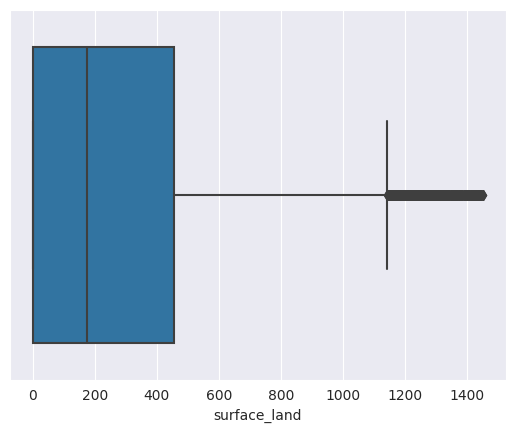

In [106]:
# Remove outlyers
df = remove_outliers_iqr(df, 'surface_land')
sns.boxplot(x=df['surface_land'])

/tmp/ipykernel_31652/654472208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['surface_land'])


<Axes: xlabel='surface_land', ylabel='Density'>

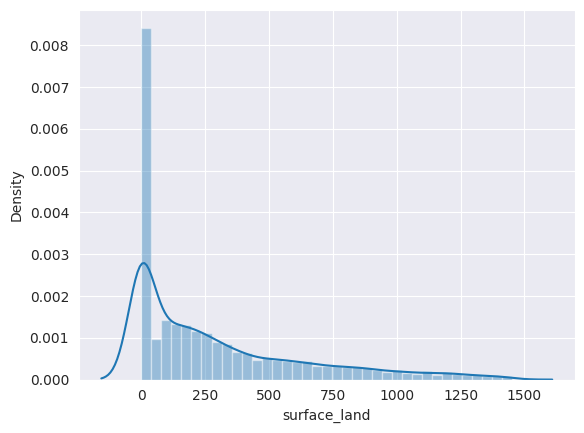

In [107]:
sns.distplot(df['surface_land'])

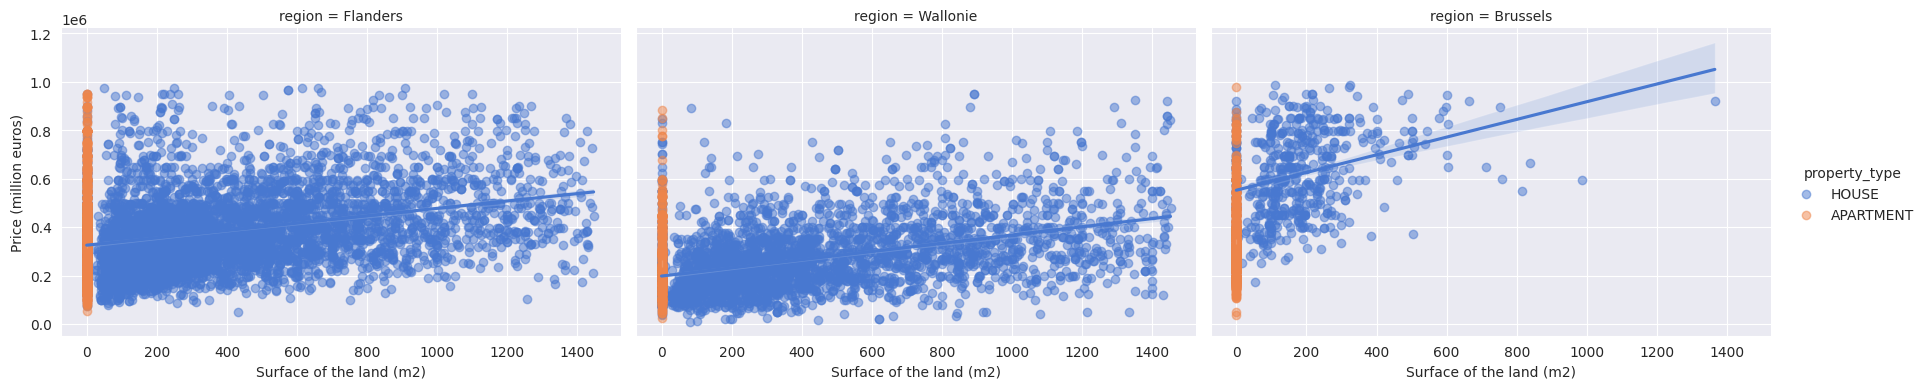

In [108]:
g = sns.FacetGrid(df, col="region", hue="property_type", height=4, aspect=1.5, palette='muted')
g.map(sns.regplot, "surface_land", "price", scatter_kws={"alpha": 0.5})
g.set_axis_labels("Surface of the land (m2)", "Price (million euros)")
g.add_legend()

### 14. Number of Facades

In [109]:
analyze_column(df, 'number_facades')

Analysis for column 'number_facades':
Number of NaN values: 0
Number of unique values: 9
Percentage of NaN values: 0.00%
Percentage of unique values: 0.07%
Unique values: ['3' '4' 0 '2' '1' 'UNKNOWN' '6' '14' '5']


In [110]:
df['number_facades'].replace('UNKNOWN', -1, inplace=True)

In [111]:
df[df['number_facades'].isnull()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude


In [112]:
df['number_facades'] = df['number_facades'].astype(int)

In [113]:
# check if any strings in the column
unique_values = df['number_facades'].unique()
string_values = [value for value in unique_values if isinstance(value, str)]

In [114]:
df['number_facades'].replace(-1, np.nan, inplace=True)

mean_facades = df.groupby('property_subtype')['number_facades'].transform('mean')
filled_facades = df.groupby('property_subtype')['number_facades'].fillna(round(mean_facades))
df['number_facades'] = filled_facades

In [115]:
df['number_facades'].unique()

array([ 3.,  4.,  0.,  2.,  1.,  6., 14.,  5.])

<Axes: xlabel='number_facades', ylabel='price'>

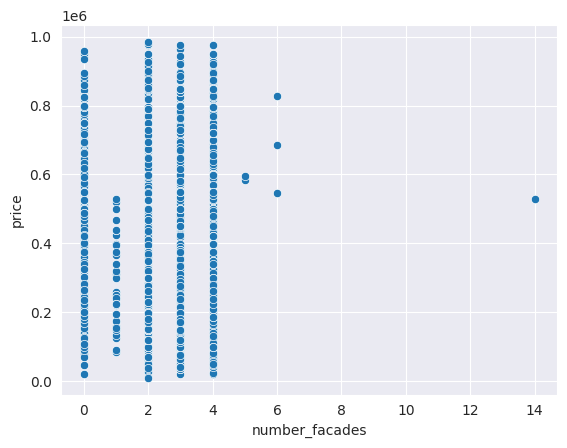

In [116]:
sns.scatterplot(df, x='number_facades', y='price')

<Axes: xlabel='number_facades'>

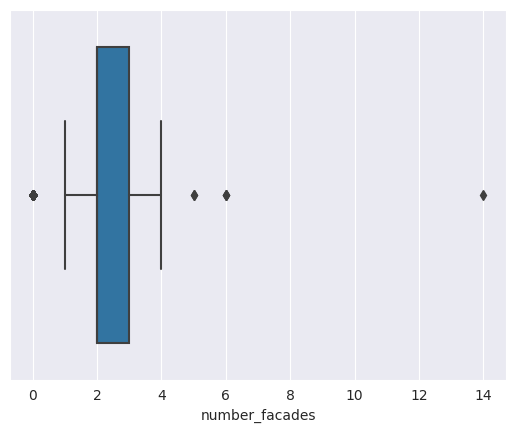

In [117]:
sns.boxplot(x=df['number_facades'])

<Axes: xlabel='number_facades'>

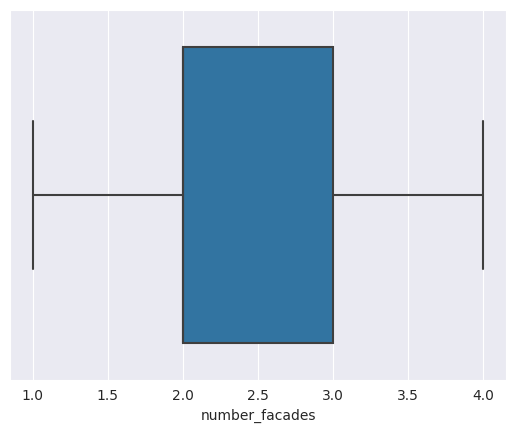

In [118]:
# Remove outlyers 
df = remove_outliers_iqr(df, 'number_facades')
sns.boxplot(x=df['number_facades'])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9907 entries, 1 to 15282
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   locality          9907 non-null   object  
 1   property_type     9907 non-null   object  
 2   property_subtype  9907 non-null   category
 3   price             9907 non-null   float64 
 4   number_rooms      9907 non-null   float64 
 5   living_area       9907 non-null   float64 
 6   kitchen           9907 non-null   object  
 7   furnished         9907 non-null   int64   
 8   fireplace         9907 non-null   float64 
 9   terrace           9907 non-null   int64   
 10  terrace_area      9907 non-null   float64 
 11  garden            9907 non-null   int64   
 12  garden_area       9907 non-null   float64 
 13  surface_land      9907 non-null   float64 
 14  number_facades    9907 non-null   float64 
 15  swimming_pool     9907 non-null   object  
 16  building_state    9907 non-n

### 15. Swimming Pool

In [120]:
analyze_column(df, 'swimming_pool')

Analysis for column 'swimming_pool':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.02%
Unique values: [0 1]


In [121]:
# change False and True to 0 and 1
df['swimming_pool'].replace(False, 0, inplace=True)
df['swimming_pool'].replace(True, 1, inplace=True)

/tmp/ipykernel_31652/2644011061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['swimming_pool'].replace(False, 0, inplace=True)
/tmp/ipykernel_31652/2644011061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['swimming_pool'].replace(True, 1, inplace=True)


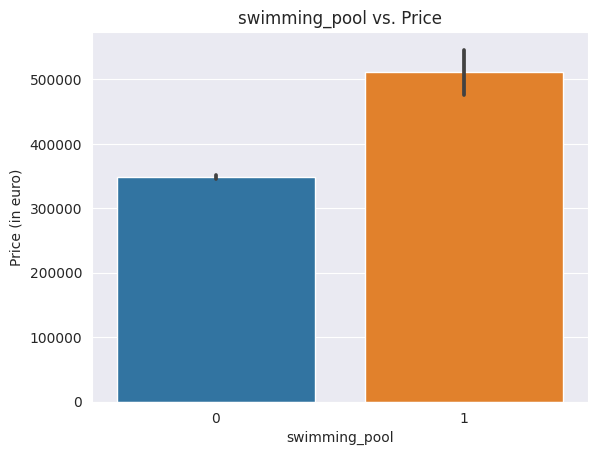

In [122]:
create_cat_plot(df, 'swimming_pool', 0)

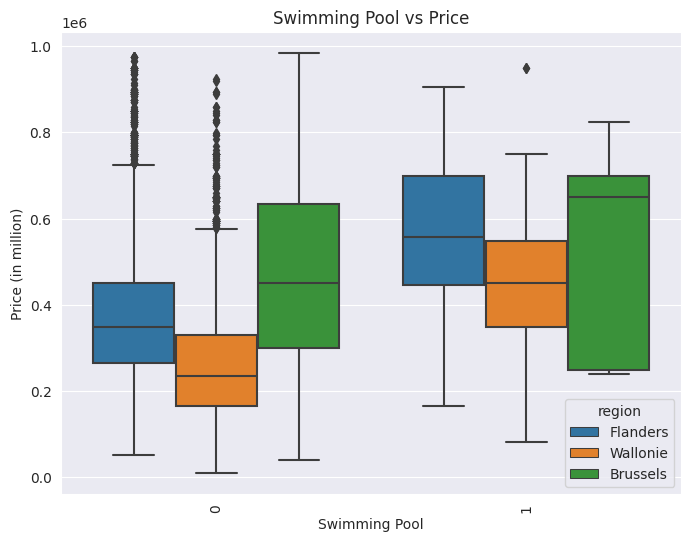

In [123]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'swimming_pool', y = 'price',  data = df,ax=ax, hue='region')
plt.title('Swimming Pool vs Price')
plt.xlabel('Swimming Pool')
plt.ylabel('Price (in million)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [124]:
df['swimming_pool'].unique()

array([0, 1])

### 16. Building State

In [125]:
analyze_column(df, 'building_state')

Analysis for column 'building_state':
Number of NaN values: 0
Number of unique values: 8
Percentage of NaN values: 0.00%
Percentage of unique values: 0.08%
Unique values: ['AS_NEW' 'JUST_RENOVATED' 'GOOD' 'TO_RENOVATE' 'TO_BE_DONE_UP' 0
 'TO_RESTORE' 'UNKNOWN']


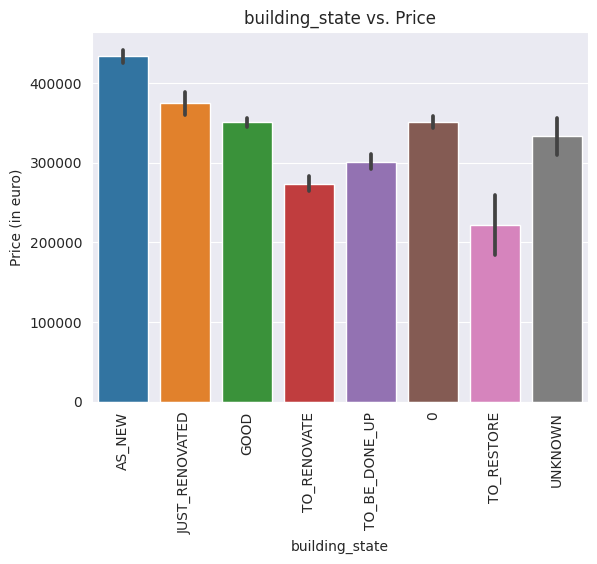

In [126]:
create_cat_plot(df, 'building_state', 90)

In [127]:
df[df['building_state'] == 'UNKNOWN']

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
549,Liège,HOUSE,HOUSE,445000.0,6.0,300.0,NOT_INSTALLED,0,0.0,0,...,0,0.0,0.0,2.0,0,UNKNOWN,Wallonie,Liège,50.645094,5.573611
688,Seraing,HOUSE,HOUSE,159000.0,2.0,95.0,NOT_DEFINED,0,0.0,1,...,1,0.0,182.0,2.0,0,UNKNOWN,Wallonie,Liège,50.615238,5.508944
737,Seraing,APARTMENT,APARTMENT,210000.0,3.0,97.0,NOT_DEFINED,0,0.0,1,...,0,0.0,0.0,2.0,0,UNKNOWN,Wallonie,Liège,50.615238,5.508944
749,Seraing,HOUSE,HOUSE,245000.0,3.0,135.0,NOT_DEFINED,0,0.0,1,...,0,0.0,173.0,2.0,0,UNKNOWN,Wallonie,Liège,50.615238,5.508944
977,Brugge,APARTMENT,APARTMENT,273900.0,2.0,97.0,NOT_DEFINED,0,0.0,1,...,0,0.0,0.0,2.0,0,UNKNOWN,Flanders,West Flanders,51.208553,3.226772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14853,Kruishoutem,HOUSE,HOUSE,395000.0,4.0,245.0,INSTALLED,0,0.0,0,...,0,0.0,150.0,2.0,0,UNKNOWN,Flanders,East Flanders,50.904824,3.528180
14896,HAMPTEAU,HOUSE,HOUSE,349000.0,5.0,183.0,INSTALLED,0,0.0,0,...,1,0.0,1332.0,2.0,0,UNKNOWN,Wallonie,Luxembourg,50.257904,5.472902
15057,Barvaux-sur-Ourthe,APARTMENT,DUPLEX,99000.0,2.0,94.0,INSTALLED,0,0.0,0,...,0,0.0,0.0,2.0,0,UNKNOWN,Wallonie,Luxembourg,50.350609,5.493284
15058,Barvaux-sur-Ourthe,APARTMENT,APARTMENT,99000.0,2.0,80.0,INSTALLED,0,0.0,0,...,0,0.0,0.0,2.0,0,UNKNOWN,Wallonie,Luxembourg,50.350609,5.493284


In [128]:
df['building_state'].replace(0, 'UNKNOWN', inplace=True)

/tmp/ipykernel_31652/2321911779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['building_state'].replace(0, 'UNKNOWN', inplace=True)


In [129]:
df['building_state'].unique()

array(['AS_NEW', 'JUST_RENOVATED', 'GOOD', 'TO_RENOVATE', 'TO_BE_DONE_UP',
       'UNKNOWN', 'TO_RESTORE'], dtype=object)

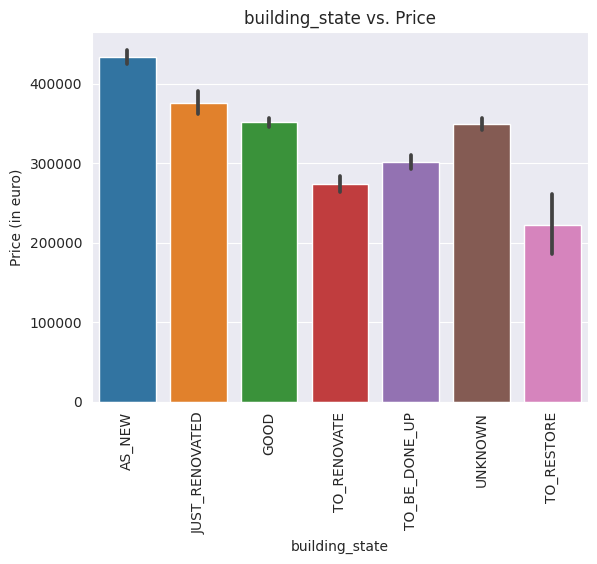

In [130]:
create_cat_plot(df, 'building_state', 90)

# 2. WRITING CLEANED DATA TO CSV

In [131]:
#write to csv
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.to_csv('data/cleaned.csv')

/tmp/ipykernel_31652/3748319980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [132]:
df

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
0,Ham,HOUSE,HOUSE,399500.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,461.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
1,Ham,HOUSE,HOUSE,381000.0,3.0,197.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,343.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
2,Ham,HOUSE,HOUSE,393500.0,3.0,192.0,HYPER_EQUIPPED,0,0.0,0,...,0,0.0,392.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
3,Ham,HOUSE,HOUSE,315000.0,3.0,197.0,NOT_INSTALLED,0,0.0,0,...,0,0.0,509.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
4,Ham,HOUSE,HOUSE,305000.0,3.0,195.0,NOT_INSTALLED,0,0.0,0,...,0,0.0,453.0,3.0,0,AS_NEW,Flanders,Limburg,49.746322,3.073303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,Geraardsbergen Ophasselt,HOUSE,HOUSE,449000.0,3.0,168.0,HYPER_EQUIPPED,0,0.0,1,...,1,150.0,480.0,3.0,0,AS_NEW,Flanders,East Flanders,50.821858,3.897035
9900,Geraardsbergen Ophasselt,HOUSE,HOUSE,549000.0,3.0,180.0,HYPER_EQUIPPED,0,0.0,1,...,1,200.0,705.0,4.0,0,AS_NEW,Flanders,East Flanders,50.821858,3.897035
9901,Geraardsbergen Ophasselt,HOUSE,HOUSE,449000.0,3.0,168.0,HYPER_EQUIPPED,0,0.0,1,...,1,200.0,517.0,3.0,0,AS_NEW,Flanders,East Flanders,50.821858,3.897035
9902,Sint-Martens-Latem,HOUSE,HOUSE,599000.0,4.0,199.0,HYPER_EQUIPPED,0,0.0,1,...,0,0.0,1104.0,4.0,0,TO_RENOVATE,Flanders,East Flanders,51.020971,3.639755


# 3. VISUALISATION

## 3.1 Heatmap

In [133]:
# create heatmap of the houses and prices according to function written in DrawHeatMap
from utils.DrawHeatmap import drawheatmap, drawfullmap
drawheatmap()

#Execute this if you want the full items and details
# Note! Takes a while to load :)
# drawfullmap()

#### Heatmap conclusion
See the ''belgian_house_prices_heatmap.html' document that has been created in the root directory. Open up in browser.

Very expensive housing in Brussels Centre / Ixelles / Uccle and Knokke Heist
Other hotspots are around all the big cities (Gent / Antwerp / Charleroi / La Louvriere / Liege / Verviers)

## 3.2 Wordcloud - Amount of properties in Cities

In [159]:
from PIL import Image
from wordcloud import WordCloud

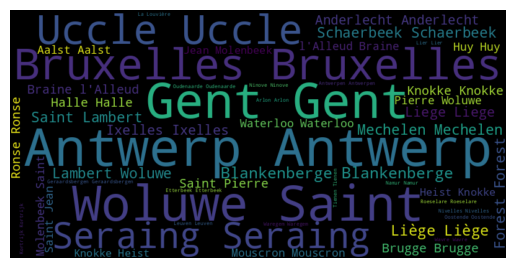

In [160]:
all_cities = ' '.join(df['locality'])
wordcloud = WordCloud(width=800, height=400, max_words=50).generate(all_cities)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Wordcloud Conclusion
Uccle / Gent / Anrwerp / Bruxelles / Woluwe Saint
All of these cities have a lot of properties for sale

## 3.2 Correlation

In [136]:
num_cols = ['price', 'number_rooms', 'living_area', 'furnished'	, 'fireplace',	'terrace','terrace_area',	'garden'	,'garden_area'	,'surface_land'	,'number_facades'	,'swimming_pool']

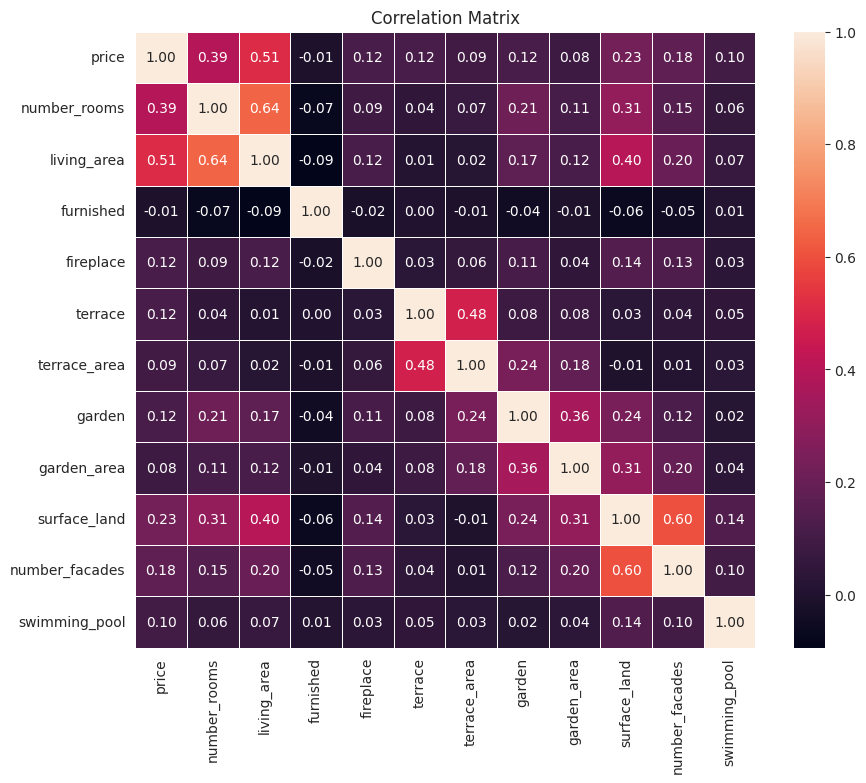

In [149]:
df_nums = df[num_cols]
correlation_matrix = df_nums.corr()

plt.figure(figsize=(10, 8))
sns.color_palette("vlag", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Correlation conclusion:
the number of rooms and living area have a high correlation with the price. So the higher the price the (usually) more rooms / area of living.

### Take Aways

Correlations:
- price is highly overall correlated with living_area
- number_rooms is highly overall correlated with living_area
- living_area is highly overall correlated with price and number_rooms, surface_land
- terrace_area is highly overall correlated with terrace
- surface_land is highly overall correlated with living_area
- terrace is highly overall correlated with terrace_area

Text(0.5, 1.0, 'Price vs Living Area')

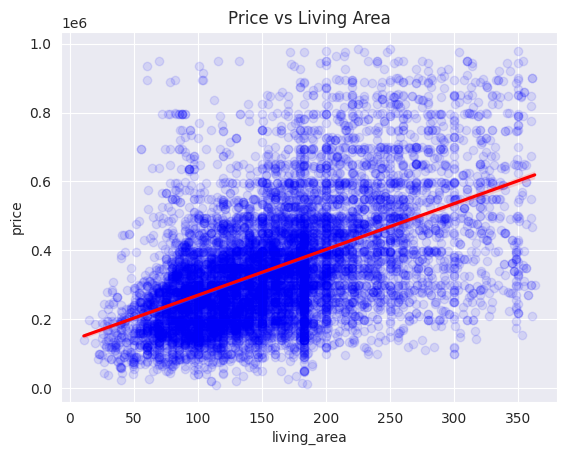

In [138]:
sns.regplot(df, x='living_area', y='price', scatter_kws = {"color": "blue", "alpha": 0.1},
            line_kws = {"color": "red"})
plt.title('Price vs Living Area')

Text(0.5, 1.0, 'Living Area vs Number of rooms')

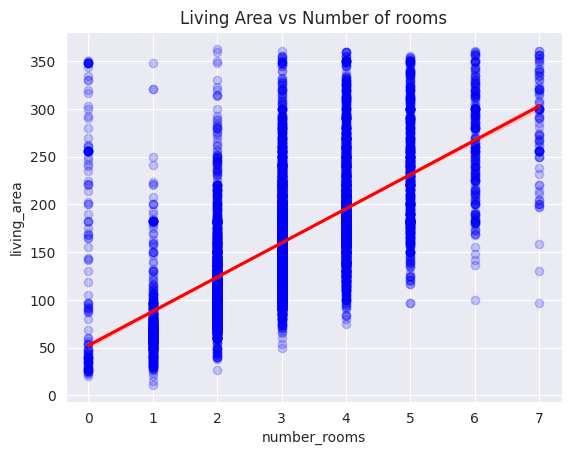

In [139]:
sns.regplot(df, x='number_rooms', y='living_area', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Living Area vs Number of rooms')

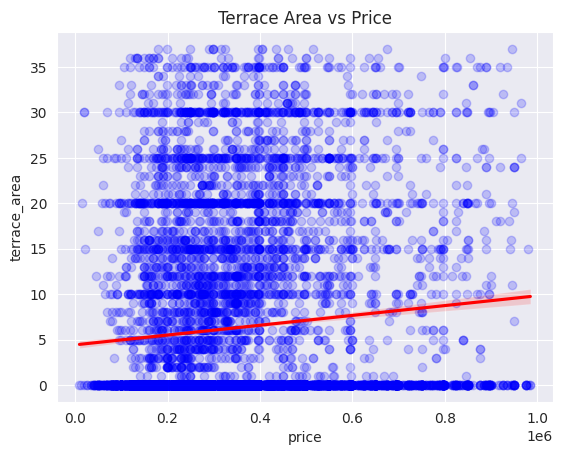

In [140]:
sns.regplot(df, x='price', y='terrace_area', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Terrace Area vs Price')
sns.set_style('darkgrid')

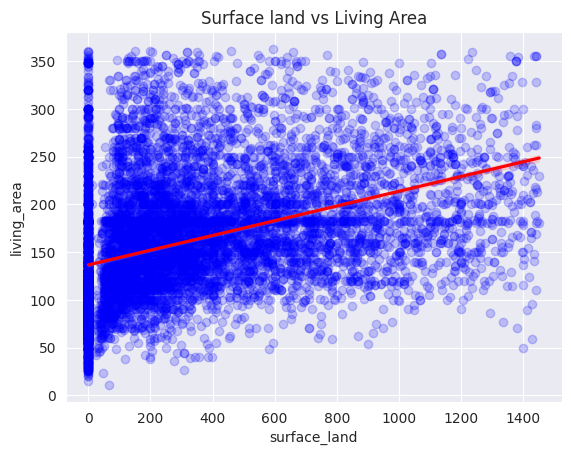

In [141]:
sns.regplot(df, x='surface_land', y='living_area', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Surface land vs Living Area')
sns.set_style('darkgrid')

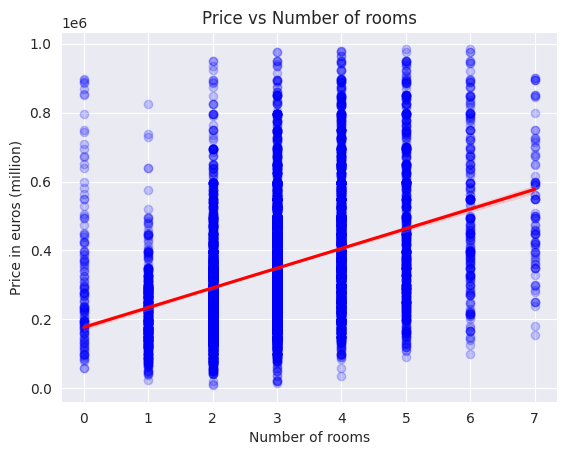

In [142]:

sns.regplot(df, x='number_rooms', y='price', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Price vs Number of rooms')
plt.ylabel('Price in euros (million)')
plt.xlabel('Number of rooms')
sns.set_style('darkgrid')

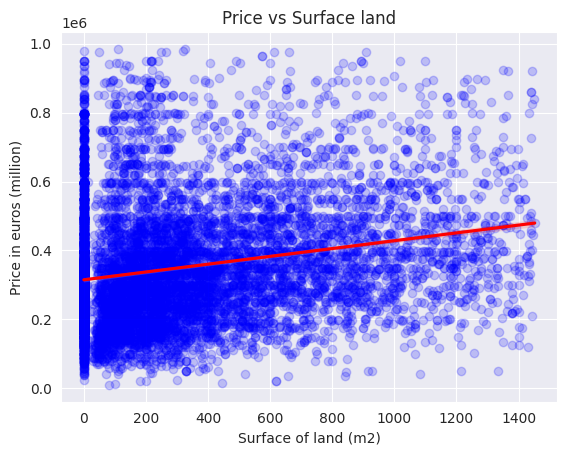

In [143]:
sns.regplot(df, x='surface_land', y='price', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Price vs Surface land')
plt.ylabel('Price in euros (million)')
plt.xlabel('Surface of land (m2)')
sns.set_style('darkgrid')

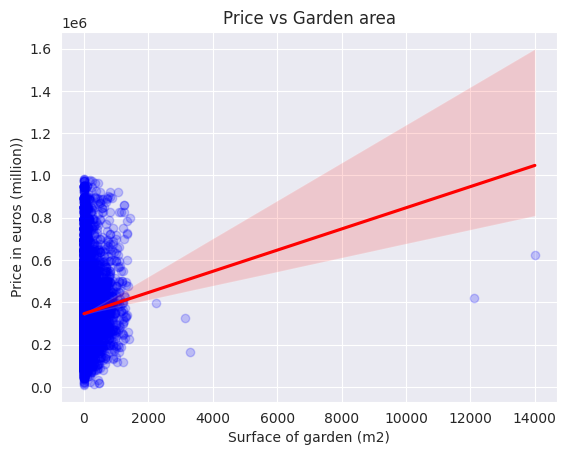

In [144]:
sns.regplot(df, x='garden_area', y='price', scatter_kws = {"color": "blue", "alpha": 0.2},
            line_kws = {"color": "red"})
plt.title('Price vs Garden area')
plt.ylabel('Price in euros (million))')
plt.xlabel('Surface of garden (m2)')
sns.set_style('darkgrid')

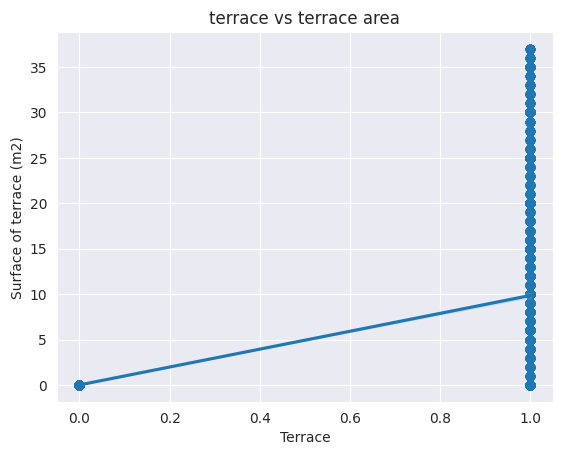

In [145]:
import seaborn as sns

sns.regplot(df, x='terrace', y='terrace_area')
plt.title('terrace vs terrace area')
plt.xlabel('Terrace')
plt.ylabel('Surface of terrace (m2)')
sns.set_style('darkgrid')

In [146]:
df.columns

Index(['locality', 'property_type', 'property_subtype', 'price',
       'number_rooms', 'living_area', 'kitchen', 'furnished', 'fireplace',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'surface_land',
       'number_facades', 'swimming_pool', 'building_state', 'region',
       'province', 'latitude', 'longitude'],
      dtype='object')

## Adding the Price per Square Meter column

In [147]:
df_new = df['price']/df['living_area']
df_new.to_frame()
df_coord = df[['latitude', 'longitude']]
df = pd.concat([df, df_new], axis=1)
df.rename(columns={0: 'price_per_area_m2'}, inplace=True)

In [150]:
# Draw the html map price per square meter
from utils.DrawHeatmap import drawheatmap_priceperm2

drawheatmap_priceperm2(df)

In [151]:
df.columns

Index(['locality', 'property_type', 'property_subtype', 'price',
       'number_rooms', 'living_area', 'kitchen', 'furnished', 'fireplace',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'surface_land',
       'number_facades', 'swimming_pool', 'building_state', 'region',
       'province', 'latitude', 'longitude', 'price_per_area_m2'],
      dtype='object')

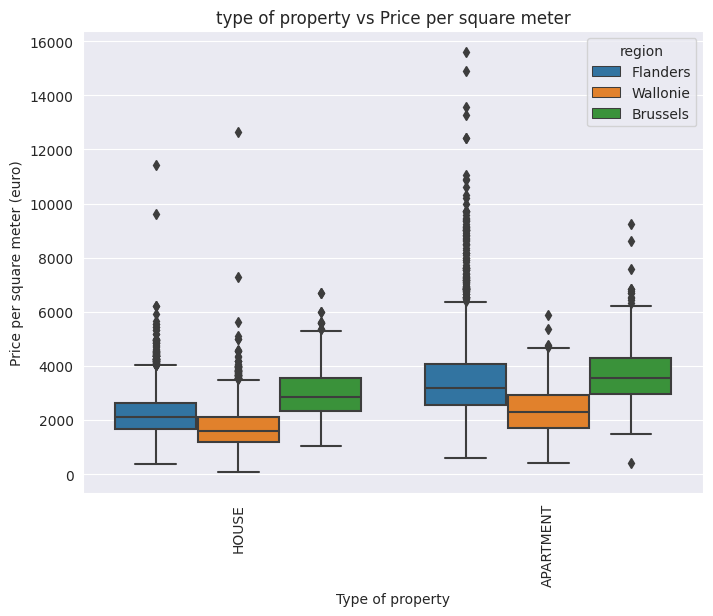

In [157]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'property_type', y = 'price_per_area_m2',  data = df,ax=ax, hue='region')
plt.title('type of property vs Price per square meter')
plt.xlabel('Type of property')
plt.ylabel('Price per square meter (euro)')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)